## Project MOD 4
- Data ingestion
- EDA for problem framing and guiding data cleaning
- Data cleaning + Universe definition (any row and column that you will explore at any point in your modelling)
- Data splitting
   X,y split
- Train / Test split (or even Train / Validation / Test)
  (If using Kfold CV, initialise folds now)
-  Feature transformations
- Feature engineering (interactions / logs / powers)
- Polynomial transformations
- Scaling
- Fit on the training data
- Transform on everything
- Modelling (checking performance on validation dataset)
- Baseline model
   Quick and easy
   Likely to perform poorly
- Check performance on validation data (or k-folds CV)
- Multiple combinations of learners + features + hyper-parameter values
- Check performance on validation data (or k-folds CV)
- Model selection
- Comparing the validation performance across your multiple models
- Selecting the best one for the problem that you are trying to solve
- Check residuals
- Interpretability counts
- Check performance on TEST dataset ONLY for your ONE chosen MODEL
- Model interpretation
- Feature importances:
   Which variables are most important for your model?
   Feature impact:
   Which variables increase/decrease your target the most?
   By how much do the most important variables impact the target?
   Show casing: (extra credit / not required)
   Take a RELEVANT case (real or hypothetical) and predict the target



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import math
pd.set_option('display.max_columns', 600)


In [2]:
data = pd.ExcelFile('2019 County Health Rankings Data - v2.xls')

data.sheet_names  # see all sheet names


['Introduction',
 'Outcomes & Factors Rankings',
 'Outcomes & Factors SubRankings',
 'Ranked Measure Data',
 'Ranked Measure Sources & Years',
 'Additional Measure Data',
 'Addtl Measure Sources & Years']

In [3]:
data.parse('Introduction',header=1)

,A collaboration between the Robert Wood Johnson Foundation and the University of Wisconsin Population Health Institute,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,This Excel file contains the rankings and data...,NaN,NaN
2,1) Outcomes and Factors Rankings--Ranks are al...,NaN,NaN
3,2) Outcomes and Factors SubRankings--Ranks are...,NaN,NaN
4,3) Ranked Measure Data--The measures themselve...,NaN,NaN
...,...,...,...
167,Long commute - driving alone,# Workers who Drive Alone,"Number of workers who commute in their car, tr..."
168,NaN,% Long Commute - Drives Alone,"Among workers who commute in their car alone, ..."
169,NaN,95% CI - Low,95% confidence interval
170,NaN,95% CI - High,NaN


In [4]:
data.parse('Ranked Measure Sources & Years',header=1)

,Focus Area,Measure,Description,Weight,Source,Year(s),Top performers,US Overall
0,Length of life (50%),Premature death,Years of potential life lost before age 75 per...,0.5,National Center for Health Statistics – Mortal...,2015-2017,5400,6900
1,Quality of life (50%),Poor or fair health,% of adults reporting fair or poor health,0.1,Behavioral Risk Factor Surveillance System,2016,0.12,0.16
2,NaN,Poor physical health days,Average # of physically unhealthy days reporte...,0.1,Behavioral Risk Factor Surveillance System,2016,3,3.7
3,NaN,Poor mental health days,Average # of mentally unhealthy days reported ...,0.1,Behavioral Risk Factor Surveillance System,2016,3.1,3.8
4,NaN,Low birthweight,% of live births with low birthweight (< 2500 ...,0.2,National Center for Health Statistics – Natali...,2011-2017,0.06,0.08
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Health Behaviors (30%),NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Focus Area,Measure,NaN,Weight,Source,Year(s),Top performers,US Overall
8,Tobacco use (10%),Adult smoking,% of adults who are current smokers,0.1,Behavioral Risk Factor Surveillance System,2016,0.14,0.17
9,Diet and exercise (10%),Adult obesity,% of adults that report a BMI ≥ 30,0.05,CDC Diabetes Interactive Atlas,2015,0.26,0.29


In [5]:
df = pd.read_csv('analytic_data2019.csv')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,24

In [6]:
df.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,Premature death CI low,Premature death CI high,Premature death (Black),Premature death (Hispanic),Premature death (White),Poor or fair health raw value,Poor or fair health numerator,Poor or fair health denominator,Poor or fair health CI low,Poor or fair health CI high,Poor physical health days raw value,Poor physical health days numerator,Poor physical health days denominator,Poor physical health days CI low,Poor physical health days CI high,Poor mental health days raw value,Poor mental health days numerator,Poor mental health days denominator,Poor mental health days CI low,Poor mental health days CI high,Low birthweight raw value,Low birthweight numerator,Low birthweight denominator,Low birthweight CI low,Low birthweight CI high,Low birthweight (Black),Low birthweight (Hispanic),Low birthweight (White),Adult smoking raw value,Adult smoking numerator,Adult smoking denominator,Adult smoking CI low,Adult smoking CI high,Adult obesity raw value,Adult obesity numerator,Adult obesity denominator,Adult obesity CI low,Adult obesity CI high,Food environment index raw value,Food environment index numerator,Food environment index denominator,Food environment index CI low,Food environment index CI high,Physical inactivity raw value,Physical inactivity numerator,Physical inactivity denominator,Physical inactivity CI low,Physical inactivity CI high,Access to exercise opportunities raw value,Access to exercise opportunities numerator,Access to exercise opportunities denominator,Access to exercise opportunities CI low,Access to exercise opportunities CI high,Excessive drinking raw value,Excessive drinking numerator,Excessive drinking denominator,Excessive drinking CI low,Excessive drinking CI high,Alcohol-impaired driving deaths raw value,Alcohol-impaired driving deaths numerator,Alcohol-impaired driving deaths denominator,Alcohol-impaired driving deaths CI low,Alcohol-impaired driving deaths CI high,Sexually transmitted infections raw value,Sexually transmitted infections numerator,Sexually transmitted infections denominator,Sexually transmitted infections CI low,Sexually transmitted infections CI high,Teen births raw value,Teen births numerator,Teen births denominator,Teen births CI low,Teen births CI high,Teen births (Black),Teen births (Hispanic),Teen births (White),Uninsured raw value,Uninsured numerator,Uninsured denominator,Uninsured CI low,Uninsured CI high,Primary care physicians raw value,Primary care physicians numerator,Primary care physicians denominator,Primary care physicians CI low,Primary care physicians CI high,Ratio of population to primary care physicians.,Dentists raw value,Dentists numerator,Dentists denominator,Dentists CI low,Dentists CI high,Ratio of population to dentists.,Mental health providers raw value,Mental health providers numerator,Mental health providers denominator,Mental health providers CI low,Mental health providers CI high,Ratio of population to mental health providers.,Preventable hospital stays raw value,Preventable hospital stays numerator,Preventable hospital stays denominator,Preventable hospital stays CI low,Preventable hospital stays CI high,Preventable hospital stays (Black),Preventable hospital stays (Hispanic),Preventable hospital stays (White),Mammography screening raw value,Mammography screening numerator,Mammography screening denominator,Mammography screening CI low,Mammography screening CI high,Mammography screening (Black),Mammography screening (Hispanic),Mammography screening (White),Flu vaccinations raw value,Flu vaccinations numerator,Flu vaccinations denominator,Flu vaccinations CI low,Flu vaccinations CI high,Flu vaccinations (Black),Flu vaccinations (Hispanic),Flu vaccinations (White),High school graduation raw value,High school graduation numerator,High school graduation denominator,High 

In [7]:
df.tail()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,Premature death CI low,Premature death CI high,Premature death (Black),Premature death (Hispanic),Premature death (White),Poor or fair health raw value,Poor or fair health numerator,Poor or fair health denominator,Poor or fair health CI low,Poor or fair health CI high,Poor physical health days raw value,Poor physical health days numerator,Poor physical health days denominator,Poor physical health days CI low,Poor physical health days CI high,Poor mental health days raw value,Poor mental health days numerator,Poor mental health days denominator,Poor mental health days CI low,Poor mental health days CI high,Low birthweight raw value,Low birthweight numerator,Low birthweight denominator,Low birthweight CI low,Low birthweight CI high,Low birthweight (Black),Low birthweight (Hispanic),Low birthweight (White),Adult smoking raw value,Adult smoking numerator,Adult smoking denominator,Adult smoking CI low,Adult smoking CI high,Adult obesity raw value,Adult obesity numerator,Adult obesity denominator,Adult obesity CI low,Adult obesity CI high,Food environment index raw value,Food environment index numerator,Food environment index denominator,Food environment index CI low,Food environment index CI high,Physical inactivity raw value,Physical inactivity numerator,Physical inactivity denominator,Physical inactivity CI low,Physical inactivity CI high,Access to exercise opportunities raw value,Access to exercise opportunities numerator,Access to exercise opportunities denominator,Access to exercise opportunities CI low,Access to exercise opportunities CI high,Excessive drinking raw value,Excessive drinking numerator,Excessive drinking denominator,Excessive drinking CI low,Excessive drinking CI high,Alcohol-impaired driving deaths raw value,Alcohol-impaired driving deaths numerator,Alcohol-impaired driving deaths denominator,Alcohol-impaired driving deaths CI low,Alcohol-impaired driving deaths CI high,Sexually transmitted infections raw value,Sexually transmitted infections numerator,Sexually transmitted infections denominator,Sexually transmitted infections CI low,Sexually transmitted infections CI high,Teen births raw value,Teen births numerator,Teen births denominator,Teen births CI low,Teen births CI high,Teen births (Black),Teen births (Hispanic),Teen births (White),Uninsured raw value,Uninsured numerator,Uninsured denominator,Uninsured CI low,Uninsured CI high,Primary care physicians raw value,Primary care physicians numerator,Primary care physicians denominator,Primary care physicians CI low,Primary care physicians CI high,Ratio of population to primary care physicians.,Dentists raw value,Dentists numerator,Dentists denominator,Dentists CI low,Dentists CI high,Ratio of population to dentists.,Mental health providers raw value,Mental health providers numerator,Mental health providers denominator,Mental health providers CI low,Mental health providers CI high,Ratio of population to mental health providers.,Preventable hospital stays raw value,Preventable hospital stays numerator,Preventable hospital stays denominator,Preventable hospital stays CI low,Preventable hospital stays CI high,Preventable hospital stays (Black),Preventable hospital stays (Hispanic),Preventable hospital stays (White),Mammography screening raw value,Mammography screening numerator,Mammography screening denominator,Mammography screening CI low,Mammography screening CI high,Mammography screening (Black),Mammography screening (Hispanic),Mammography screening (White),Flu vaccinations raw value,Flu vaccinations numerator,Flu vaccinations denominator,Flu vaccinations CI low,Flu vaccinations CI high,Flu vaccinations (Black),Flu vaccinations (Hispanic),Flu vaccinations (White),High school graduation raw value,High school graduation numerator,High school graduation denominator,High 

In [8]:
df.shape

(3195, 534)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Columns: 534 entries, State FIPS Code to Population growth raw value
dtypes: object(534)
memory usage: 13.0+ MB


In [10]:
# Columns to keep to our diabetis study

df_diabetes = df.loc[:, ["State FIPS Code", 
"County FIPS Code", 
"5-digit FIPS Code", 
"State Abbreviation", 
"Name",
"Poor or fair health raw value",
"Poor physical health days raw value",
"Poor mental health days raw value",
"Adult smoking raw value",
"Adult obesity raw value",
"Food environment index raw value",
"Physical inactivity raw value",
"Access to exercise opportunities raw value",
"Excessive drinking raw value",
"Uninsured raw value",
"Primary care physicians raw value",
"Dentists raw value",
"Mental health providers raw value",
"Some college raw value",
"Unemployment raw value",
"Children in poverty raw value",
"Income inequality raw value",
"Children in single-parent households raw value",
"Social associations raw value",
"Air pollution - particulate matter raw value",
"Severe housing problems raw value",
"Long commute - driving alone raw value",
"Life expectancy raw value",
"Food insecurity raw value",
"Limited access to healthy foods raw value",
"Insufficient sleep raw value",
"Uninsured adults raw value",
"Median household income raw value",
"Children eligible for free or reduced price lunch raw value",
"Residential segregation - non-white/white raw value",
"Severe housing cost burden raw value",
"% below 18 years of age raw value",
"% 65 and older raw value",
"% Rural raw value",
"Diabetes prevalence raw value"]]

In [11]:
df_diabetes.shape

(3195, 40)

In [12]:
df_diabetes2=df_diabetes.copy()
df_diabetes2 = df_diabetes2.rename(columns = {"State FIPS Code" : "state_code", 
"County FIPS Code" : "county_code" , 
"5-digit FIPS Code" : "FIPS_code", 
"State Abbreviation" : "state_abr", 
"Name" : "county_name",
"Poor or fair health raw value" : "poor_fair_health",
"Poor physical health days raw value" : "poor_health_days",
"Poor mental health days raw value" : "poor_mental_health_days",
"Adult smoking raw value" : "adult_smoking",
"Adult obesity raw value" : "adult_obesity",
"Food environment index raw value" : "food_environ_index",
"Physical inactivity raw value" : "physical_inactivity",
"Access to exercise opportunities raw value" : "access_to_exercise",
"Excessive drinking raw value" : "excessive_drinking",
"Uninsured raw value" : "uninsured",
"Primary care physicians raw value" : "primary_care",
"Dentists raw value" : "dentists",
"Mental health providers raw value" : "mental_care",
"Some college raw value" : "some_college",
"Unemployment raw value" : "unemployment",
"Children in poverty raw value" : "children_in_poverty",
"Income inequality raw value" : "income_in_equality",
"Children in single-parent households raw value" : "single_parent_children",
"Social associations raw value" : "social_associations",
"Air pollution - particulate matter raw value" : "air_pollution",
"Severe housing problems raw value" : "severe_housing",
"Long commute - driving alone raw value" : "long_commute",
"Life expectancy raw value" : "life_expectancy",
"Food insecurity raw value" : "food_insecurity",
"Limited access to healthy foods raw value" : "limited_access_heatlh_food",
"Insufficient sleep raw value" : "insufficient_sleep",
"Uninsured adults raw value" : "uninsured_adults",
"Median household income raw value" : "med_hh_Income",
"Children eligible for free or reduced price lunch raw value" : "children_free_lunch",
"Residential segregation - non-white/white raw value" : "residential_segregation",
"Severe housing cost burden raw value" : "severe_housing_cost",
"% below 18 years of age raw value" : "under_18",
"% 65 and older raw value" : "over_65",
"% Rural raw value" : "rural",
"Diabetes prevalence raw value" : "diabetes_target"})

In [13]:
df_diabetes2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 40 columns):
state_code                    3195 non-null object
county_code                   3195 non-null object
FIPS_code                     3195 non-null object
state_abr                     3195 non-null object
county_name                   3195 non-null object
poor_fair_health              3194 non-null object
poor_health_days              3194 non-null object
poor_mental_health_days       3194 non-null object
adult_smoking                 3194 non-null object
adult_obesity                 3195 non-null object
food_environ_index            3176 non-null object
physical_inactivity           3195 non-null object
access_to_exercise            3189 non-null object
excessive_drinking            3194 non-null object
uninsured                     3194 non-null object
primary_care                  3060 non-null object
dentists                      3110 non-null object
mental_care               

In [14]:
df_diabetes2.head()

,state_code,county_code,FIPS_code,state_abr,county_name,poor_fair_health,poor_health_days,poor_mental_health_days,adult_smoking,adult_obesity,food_environ_index,physical_inactivity,access_to_exercise,excessive_drinking,uninsured,primary_care,dentists,mental_care,some_college,unemployment,children_in_poverty,income_in_equality,single_parent_children,social_associations,air_pollution,severe_housing,long_commute,life_expectancy,food_insecurity,limited_access_heatlh_food,insufficient_sleep,uninsured_adults,med_hh_Income,children_free_lunch,residential_segregation,severe_housing_cost,under_18,over_65,rural,diabetes_target
0,statecode,countycode,fipscode,state,county,v002_rawvalue,v036_rawvalue,v042_rawvalue,v009_rawvalue,v011_rawvalue,v133_rawvalue,v070_rawvalue,v132_rawvalue,v049_rawvalue,v085_rawvalue,v004_rawvalue,v088_rawvalue,v062_rawvalue,v069_rawvalue,v023_rawvalue,v024_rawvalue,v044_rawvalue,v082_rawvalue,v140_rawvalue,v125_rawvalue,v136_rawvalue,v137_rawvalue,v147_rawvalue,v139_rawvalue,v083_rawvalue,v143_rawvalue,v003_rawvalue,v063_rawvalue,v065_rawvalue,v142_rawvalue,v154_rawvalue,v052_rawvalue,v053_rawvalue,v058_rawvalue,v060_rawvalue
1,00,000,00000,US,United States,NaN,NaN,NaN,NaN,0.285,7.7,0.222,0.8389448174,NaN,0.1000885875,0.000754309,0.0006843073,0.0022868902,0.6522563975,0.0435556876,0.184,4.9414857531,0.3325168477,9.3003532014,NaN,0.1837308951,0.352,79.063850411,0.129,0.0590124246,NaN,0.1208028915,60336,0.5196293055,NaN,0.1512417878,0.2261315359,0.1561427218,NaN,0.102
2,01,000,01000,AL,Alabama,0.2140240566,4.4004575204,4.577366748,0.215381544,0.351,5.8,0.282,0.6164961831,0.1417814586,0.107717996,0.000653877,0.0004761273,0.0009050726,0.5986474992,0.0439678517,0.244,5.238579235,0.3810461622,12.242715851,11,0.1491215019,0.337,75.41303499,0.165,0.0792142495,0.3772095459,0.1384998828,48193,0.5174145318,51.161473293,0.1291760781,0.2247240729,0.1648846597,0.409631829,0.139
3,01,001,01001,AL,Autauga County,0.1841112436,4.2005779826,4.3067392835,0.191246585,0.375,7.2,0.311,0.686775027,0.1687801512,0.085009665,0.0004150426,0.000324301,0.0001621505,0.6085466499,0.0386352233,0.193,4.6366638778,0.2470009686,12.631730908,11.7,0.1495464575,0.383,76.330589011,0.134,0.11991125,0.3590540606,0.1096110384,58343,0.4793166434,27.14756927,0.1264520575,0.2393701355,0.1511963102,0.4200216232,0.142
4,01,003,01003,AL,Baldwin County,0.1806045782,4.0987477691,4.2496487805,0.1679548515,0.31,8,0.238,0.7197103119,0.1671496869,0.1069928804,0.0007287966,0.0004985232,0.0009123916,0.6613392634,0.0398833641,0.147,4.5185596041,0.2518409096,10.692212904,10.3,0.1383172525,0.405,78.599497656,0.123,0.054244266,0.3330586814,0.1357031075,56607,0.4507913116,33.240059197,0.1279592201,0.2184848656,0.1994704366,0.4227909911,0.113


In [15]:
df_diabetes2 = df_diabetes2.iloc[2:]# Remove the first two rows

In [16]:
df_diabetes2.head()

,state_code,county_code,FIPS_code,state_abr,county_name,poor_fair_health,poor_health_days,poor_mental_health_days,adult_smoking,adult_obesity,food_environ_index,physical_inactivity,access_to_exercise,excessive_drinking,uninsured,primary_care,dentists,mental_care,some_college,unemployment,children_in_poverty,income_in_equality,single_parent_children,social_associations,air_pollution,severe_housing,long_commute,life_expectancy,food_insecurity,limited_access_heatlh_food,insufficient_sleep,uninsured_adults,med_hh_Income,children_free_lunch,residential_segregation,severe_housing_cost,under_18,over_65,rural,diabetes_target
2,01,000,01000,AL,Alabama,0.2140240566,4.4004575204,4.577366748,0.215381544,0.351,5.8,0.282,0.6164961831,0.1417814586,0.107717996,0.000653877,0.0004761273,0.0009050726,0.5986474992,0.0439678517,0.244,5.238579235,0.3810461622,12.242715851,11,0.1491215019,0.337,75.41303499,0.165,0.0792142495,0.3772095459,0.1384998828,48193,0.5174145318,51.161473293,0.1291760781,0.2247240729,0.1648846597,0.409631829,0.139
3,01,001,01001,AL,Autauga County,0.1841112436,4.2005779826,4.3067392835,0.191246585,0.375,7.2,0.311,0.686775027,0.1687801512,0.085009665,0.0004150426,0.000324301,0.0001621505,0.6085466499,0.0386352233,0.193,4.6366638778,0.2470009686,12.631730908,11.7,0.1495464575,0.383,76.330589011,0.134,0.11991125,0.3590540606,0.1096110384,58343,0.4793166434,27.14756927,0.1264520575,0.2393701355,0.1511963102,0.4200216232,0.142
4,01,003,01003,AL,Baldwin County,0.1806045782,4.0987477691,4.2496487805,0.1679548515,0.31,8,0.238,0.7197103119,0.1671496869,0.1069928804,0.0007287966,0.0004985232,0.0009123916,0.6613392634,0.0398833641,0.147,4.5185596041,0.2518409096,10.692212904,10.3,0.1383172525,0.405,78.599497656,0.123,0.054244266,0.3330586814,0.1357031075,56607,0.4507913116,33.240059197,0.1279592201,0.2184848656,0.1994704366,0.4227909911,0.113
5,01,005,01005,AL,Barbour County,0.2577341563,5.0674383044,4.634994147,0.2154087757,0.443,5.6,0.282,0.5362566923,0.1269871542,0.1251319664,0.0003851338,0.0003561535,0.0000791452,0.3677400805,0.0590092278,0.503,5.7550626063,0.5721574344,8.4729443482,11.5,0.1545553145,0.338,75.77945737,0.232,0.1073966657,0.3856316713,0.1654223969,32490,0.7376980817,24.31376525,0.1358676522,0.2076375148,0.1882469331,0.677896347,0.18
6,01,007,01007,AL,Bibb County,0.1999691186,4.3633772783,4.3157100192,0.1991640424,0.378,7.6,0.349,0.1625136374,0.1592515079,0.0968007528,0.0005741289,0.0002646903,0.0000882301,0.4840631037,0.043851399,0.273,4.2545944386,0.2956540355,10.15766462,11.2,0.1096085409,0.486,73.928271076,0.158,0.0260162701,0.381488654,0.1229731899,45795,0.6532968703,38.49942387,0.0873388931,0.2060614082,0.1602258691,0.6835260746,0.149


In [17]:
df_diabetes2.isna().sum()

state_code                      0
county_code                     0
FIPS_code                       0
state_abr                       0
county_name                     0
poor_fair_health                0
poor_health_days                0
poor_mental_health_days         0
adult_smoking                   0
adult_obesity                   0
food_environ_index             19
physical_inactivity             0
access_to_exercise              6
excessive_drinking              0
uninsured                       1
primary_care                  135
dentists                       85
mental_care                   252
some_college                    0
unemployment                    1
children_in_poverty             1
income_in_equality              0
single_parent_children          1
social_associations             0
air_pollution                  36
severe_housing                  0
long_commute                    0
life_expectancy                69
food_insecurity                 0
limited_access

In [18]:
diabetes_2016 = pd.read_csv('DiabetesAtlasCountyData.csv')

In [19]:
diabetes_2016.head()

,County,State,CountyFIPS,Percentage,Lower Limit,Upper Limit
0,Autauga County,Alabama,1001,11.1,7.8,15.5
1,Baldwin County,Alabama,1003,10.7,9,12.6
2,Barbour County,Alabama,1005,17.6,12.3,23.9
3,Bibb County,Alabama,1007,14.5,9.5,21
4,Blount County,Alabama,1009,17,12.7,22.2


In [20]:
# CountyFPIS to 5 digits string
diabetes_2016['CountyFIPS'] = diabetes_2016['CountyFIPS'].map(lambda x: str(x).zfill(5))


In [21]:
diabetes_2016.shape

(3226, 6)

In [22]:
diabetes_2016.tail()

,County,State,CountyFIPS,Percentage,Lower Limit,Upper Limit
3221,Sweetwater County,Wyoming,56037,8.8,7.1,11
3222,Teton County,Wyoming,56039,2.2,1.3,3.4
3223,Uinta County,Wyoming,56041,11.3,8.6,14.2
3224,Washakie County,Wyoming,56043,11.7,8.6,15.3
3225,Weston County,Wyoming,56045,9,6.1,12.6


In [23]:
# Updated data of median income to 2016
median_income_2016 = pd.ExcelFile('est16all.xls')
median_income_2016.sheet_names 

['est16ALL']

In [24]:
median_income_2016.parse('est16ALL',skiprows = 3)

,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound.1,90% CI Upper Bound.1,"Poverty Estimate, Age 0-17",90% CI Lower Bound.2,90% CI Upper Bound.2,"Poverty Percent, Age 0-17",90% CI Lower Bound.3,90% CI Upper Bound.3,"Poverty Estimate, Age 5-17 in Families",90% CI Lower Bound.4,90% CI Upper Bound.4,"Poverty Percent, Age 5-17 in Families",90% CI Lower Bound.5,90% CI Upper Bound.5,Median Household Income,90% CI Lower Bound.6,90% CI Upper Bound.6,"Poverty Estimate, Age 0-4",90% CI Lower Bound.7,90% CI Upper Bound.7,"Poverty Percent, Age 0-4",90% CI Lower Bound.8,90% CI Upper Bound.8
0,0,0,US,United States,44268996,44022086,44515906,14,13.9,14.1,14115713,13976345,14255081,19.5,19.3,19.7,9648486,9548767,9748205,18.3,18.1,18.5,57617,57502,57732,4156949,4108397,4205501,21.3,21.1,21.5
1,1,0,AL,Alabama,814197,796927,831467,17.2,16.8,17.6,267674,258276,277072,24.7,23.8,25.6,185889,177569,194209,23.5,22.4,24.6,46309,45650,46968,78675,74257,83093,27.4,25.9,28.9
2,1,1,AL,Autauga County,7444,6255,8633,13.5,11.3,15.7,2588,2090,3086,19.3,15.6,23,1887,1522,2252,18.4,14.8,22,54487,50886,58088,.,.,.,.,.,.
3,1,3,AL,Baldwin County,24005,20132,27878,11.7,9.8,13.6,7881,6231,9531,17.6,13.9,21.3,5512,4262,6762,16.6,12.8,20.4,56460,53250,59670,.,.,.,.,.,.
4,1,5,AL,Barbour County,6787,5551,8023,29.9,24.5,35.3,2146,1675,2617,39.6,30.9,48.3,1502,1160,1844,36.8,28.4,45.2,32884,29684,36084,.,.,.,.,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,37,WY,Sweetwater County,4264,3610,4918,9.8,8.3,11.3,1073,790,1356,9.2,6.8,11.6,614,414,814,7.2,4.9,9.5,74546,68674,80418,.,.,.,.,.,.
3190,56,39,WY,Teton County,1680,1367,1993,7.3,5.9,8.7,288,203,373,6.7,4.7,8.7,170,112,228,5.5,3.6,7.4,84118,75630,92606,.,.,.,.,.,.
3191,56,41,WY,Uinta County,2183,1738,2628,10.6,8.4,12.8,681,498,864,11.3,8.3,14.3,420,293,547,9.6,6.7,12.5,64713,57915,71511,.,.,.,.,.,.
3192,56,43,WY,Washakie County,1060,855,1265,13.1,10.6,15.6,289,215,363,15.2,11.3,19.1,178,122,234,12.5,8.6,16.4,49533,44889,54177,.,.,.,.,.,.


In [25]:
# Only interested on a few columns
median_income_2016_df= median_income_2016.parse('est16ALL', skiprows= 3).loc[:, 
                                                                              ['State FIPS Code', 'County FIPS Code', 
                                                                               'Postal Code', 'Name', 'Median Household Income']]

In [26]:
median_income_2016_df.head() 

,State FIPS Code,County FIPS Code,Postal Code,Name,Median Household Income
0,0,0,US,United States,57617
1,1,0,AL,Alabama,46309
2,1,1,AL,Autauga County,54487
3,1,3,AL,Baldwin County,56460
4,1,5,AL,Barbour County,32884


In [27]:
# State FIPS code to 2 digits + County FIPS Code to 3 digits and then save it on a column as a 5 digits
median_income_2016_df['five_digit_FIPS_Code'] = median_income_2016_df['State FIPS Code'].map(lambda x: str(x).zfill(2)) + median_income_2016_df['County FIPS Code'].map(lambda x: str(x).zfill(3))

In [28]:
median_income_2016_df.head()

,State FIPS Code,County FIPS Code,Postal Code,Name,Median Household Income,five_digit_FIPS_Code
0,0,0,US,United States,57617,00000
1,1,0,AL,Alabama,46309,01000
2,1,1,AL,Autauga County,54487,01001
3,1,3,AL,Baldwin County,56460,01003
4,1,5,AL,Barbour County,32884,01005


In [29]:
# Updated data for unemployment
unemployment_2016 = pd.ExcelFile('laucnty16.xlsx')

In [30]:
unemployment_2016.sheet_names

['laucnty16']

In [31]:
unemployment_2016_df =unemployment_2016.parse('laucnty16',skiprows= 4);

In [32]:
unemployment_2016_df.shape

(3223, 10)

In [33]:
unemployment_2016_df.head()

,Code,Code.1,Code.2,County Name/State Abbreviation,Year,Unnamed: 5,Force,Employed,Unemployed,(%)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CN0100100000000,1.0,1.0,"Autauga County, AL",2016.0,NaN,25966.0,24645.0,1321.0,5.1
2,CN0100300000000,1.0,3.0,"Baldwin County, AL",2016.0,NaN,90670.0,85839.0,4831.0,5.3
3,CN0100500000000,1.0,5.0,"Barbour County, AL",2016.0,NaN,8417.0,7717.0,700.0,8.3
4,CN0100700000000,1.0,7.0,"Bibb County, AL",2016.0,NaN,8623.0,8067.0,556.0,6.4


In [34]:
unemployment_2016_df.tail()

,Code,Code.1,Code.2,County Name/State Abbreviation,Year,Unnamed: 5,Force,Employed,Unemployed,(%)
3218,CN7215100000000,72.0,151.0,"Yabucoa Municipio, PR",2016.0,NaN,9073.0,7540.0,1533.0,16.9
3219,CN7215300000000,72.0,153.0,"Yauco Municipio, PR",2016.0,NaN,10726.0,8713.0,2013.0,18.8
3220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3221,"SOURCE: BLS, LAUS",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3222,"April 19, 2019",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# We removed the first row and the last 3 rows from dataframe
unemployment_2016_df =unemployment_2016_df[1:len(unemployment_2016_df)-3]

In [36]:
unemployment_2016_df['Code.1'] = unemployment_2016_df['Code.1'].map( lambda x: str(int(x)).zfill(2))
unemployment_2016_df['Code.2'] = unemployment_2016_df['Code.2'].map( lambda x: str(int(x)).zfill(3))



In [37]:
unemployment_2016_df['five_digit_FIPS_Code'] = unemployment_2016_df['Code.1'] + unemployment_2016_df['Code.2']


In [38]:
unemployment_2016_df.head()

,Code,Code.1,Code.2,County Name/State Abbreviation,Year,Unnamed: 5,Force,Employed,Unemployed,(%),five_digit_FIPS_Code
1,CN0100100000000,01,001,"Autauga County, AL",2016.0,NaN,25966.0,24645.0,1321.0,5.1,01001
2,CN0100300000000,01,003,"Baldwin County, AL",2016.0,NaN,90670.0,85839.0,4831.0,5.3,01003
3,CN0100500000000,01,005,"Barbour County, AL",2016.0,NaN,8417.0,7717.0,700.0,8.3,01005
4,CN0100700000000,01,007,"Bibb County, AL",2016.0,NaN,8623.0,8067.0,556.0,6.4,01007
5,CN0100900000000,01,009,"Blount County, AL",2016.0,NaN,24623.0,23298.0,1325.0,5.4,01009


In [39]:
unemployment_2016_df.shape

(3219, 11)

In [40]:
# Preparing dataframes ready to merge Check the FIPS 
df_diabetes2['FIPS_code'] = df_diabetes2['FIPS_code'].map(lambda x: str(x))
diabetes_2016['CountyFIPS']= diabetes_2016['CountyFIPS'].map(lambda x: str(x))
median_income_2016_df['five_digit_FIPS_Code'] =median_income_2016_df['five_digit_FIPS_Code'].map(lambda x: str(x))
unemployment_2016_df['five_digit_FIPS_Code'] =unemployment_2016_df['five_digit_FIPS_Code'].map(lambda x: str(x))


In [41]:
# Merging of the dataframes
df_diabetes2 = df_diabetes2.merge(diabetes_2016[['CountyFIPS', 'Percentage']], how = 'left', left_on = 'FIPS_code', right_on = 'CountyFIPS')



In [42]:
df_diabetes2 = df_diabetes2.merge(median_income_2016_df[['five_digit_FIPS_Code', 'Median Household Income']], how = 'left', left_on = 'FIPS_code', right_on = 'five_digit_FIPS_Code')


In [43]:
df_diabetes2 = df_diabetes2.merge(unemployment_2016_df[['five_digit_FIPS_Code', '(%)']], how = 'left', left_on = 'FIPS_code', right_on = 'five_digit_FIPS_Code')


In [44]:
df_diabetes2.head()

,state_code,county_code,FIPS_code,state_abr,county_name,poor_fair_health,poor_health_days,poor_mental_health_days,adult_smoking,adult_obesity,food_environ_index,physical_inactivity,access_to_exercise,excessive_drinking,uninsured,primary_care,dentists,mental_care,some_college,unemployment,children_in_poverty,income_in_equality,single_parent_children,social_associations,air_pollution,severe_housing,long_commute,life_expectancy,food_insecurity,limited_access_heatlh_food,insufficient_sleep,uninsured_adults,med_hh_Income,children_free_lunch,residential_segregation,severe_housing_cost,under_18,over_65,rural,diabetes_target,CountyFIPS,Percentage,five_digit_FIPS_Code_x,Median Household Income,five_digit_FIPS_Code_y,(%)
0,01,000,01000,AL,Alabama,0.2140240566,4.4004575204,4.577366748,0.215381544,0.351,5.8,0.282,0.6164961831,0.1417814586,0.107717996,0.000653877,0.0004761273,0.0009050726,0.5986474992,0.0439678517,0.244,5.238579235,0.3810461622,12.242715851,11,0.1491215019,0.337,75.41303499,0.165,0.0792142495,0.3772095459,0.1384998828,48193,0.5174145318,51.161473293,0.1291760781,0.2247240729,0.1648846597,0.409631829,0.139,NaN,NaN,01000,46309,NaN,NaN
1,01,001,01001,AL,Autauga County,0.1841112436,4.2005779826,4.3067392835,0.191246585,0.375,7.2,0.311,0.686775027,0.1687801512,0.085009665,0.0004150426,0.000324301,0.0001621505,0.6085466499,0.0386352233,0.193,4.6366638778,0.2470009686,12.631730908,11.7,0.1495464575,0.383,76.330589011,0.134,0.11991125,0.3590540606,0.1096110384,58343,0.4793166434,27.14756927,0.1264520575,0.2393701355,0.1511963102,0.4200216232,0.142,01001,11.1,01001,54487,01001,5.1
2,01,003,01003,AL,Baldwin County,0.1806045782,4.0987477691,4.2496487805,0.1679548515,0.31,8,0.238,0.7197103119,0.1671496869,0.1069928804,0.0007287966,0.0004985232,0.0009123916,0.6613392634,0.0398833641,0.147,4.5185596041,0.2518409096,10.692212904,10.3,0.1383172525,0.405,78.599497656,0.123,0.054244266,0.3330586814,0.1357031075,56607,0.4507913116,33.240059197,0.1279592201,0.2184848656,0.1994704366,0.4227909911,0.113,01003,10.7,01003,56460,01003,5.3
3,01,005,01005,AL,Barbour County,0.2577341563,5.0674383044,4.634994147,0.2154087757,0.443,5.6,0.282,0.5362566923,0.1269871542,0.1251319664,0.0003851338,0.0003561535,0.0000791452,0.3677400805,0.0590092278,0.503,5.7550626063,0.5721574344,8.4729443482,11.5,0.1545553145,0.338,75.77945737,0.232,0.1073966657,0.3856316713,0.1654223969,32490,0.7376980817,24.31376525,0.1358676522,0.2076375148,0.1882469331,0.677896347,0.18,01005,17.6,01005,32884,01005,8.3
4,01,007,01007,AL,Bibb County,0.1999691186,4.3633772783,4.3157100192,0.1991640424,0.378,7.6,0.349,0.1625136374,0.1592515079,0.0968007528,0.0005741289,0.0002646903,0.0000882301,0.4840631037,0.043851399,0.273,4.2545944386,0.2956540355,10.15766462,11.2,0.1096085409,0.486,73.928271076,0.158,0.0260162701,0.381488654,0.1229731899,45795,0.6532968703,38.49942387,0.0873388931,0.2060614082,0.1602258691,0.6835260746,0.149,01007,14.5,01007,43079,01007,6.4


In [45]:
df_diabetes2.shape

(3193, 46)

In [46]:
# Drop columns the extra ones for FIPS and then the old 2015 diabetes, 
#income and unemployment
df_diabetes2 = df_diabetes2.drop(['CountyFIPS', 'five_digit_FIPS_Code_x', 'five_digit_FIPS_Code_y'], axis = 1)



In [47]:
df_diabetes2 = df_diabetes2.drop(['diabetes_target', 'med_hh_Income', 'unemployment'], axis = 1)



In [48]:
df_diabetes2 = df_diabetes2.rename(columns = {'Percentage': 'diabetes_target',
                              'Median Household Income': 'med_hh_Income',
                             '(%)': 'unemployment'})

In [49]:
df_diabetes2.head()

,state_code,county_code,FIPS_code,state_abr,county_name,poor_fair_health,poor_health_days,poor_mental_health_days,adult_smoking,adult_obesity,food_environ_index,physical_inactivity,access_to_exercise,excessive_drinking,uninsured,primary_care,dentists,mental_care,some_college,children_in_poverty,income_in_equality,single_parent_children,social_associations,air_pollution,severe_housing,long_commute,life_expectancy,food_insecurity,limited_access_heatlh_food,insufficient_sleep,uninsured_adults,children_free_lunch,residential_segregation,severe_housing_cost,under_18,over_65,rural,diabetes_target,med_hh_Income,unemployment
0,01,000,01000,AL,Alabama,0.2140240566,4.4004575204,4.577366748,0.215381544,0.351,5.8,0.282,0.6164961831,0.1417814586,0.107717996,0.000653877,0.0004761273,0.0009050726,0.5986474992,0.244,5.238579235,0.3810461622,12.242715851,11,0.1491215019,0.337,75.41303499,0.165,0.0792142495,0.3772095459,0.1384998828,0.5174145318,51.161473293,0.1291760781,0.2247240729,0.1648846597,0.409631829,NaN,46309,NaN
1,01,001,01001,AL,Autauga County,0.1841112436,4.2005779826,4.3067392835,0.191246585,0.375,7.2,0.311,0.686775027,0.1687801512,0.085009665,0.0004150426,0.000324301,0.0001621505,0.6085466499,0.193,4.6366638778,0.2470009686,12.631730908,11.7,0.1495464575,0.383,76.330589011,0.134,0.11991125,0.3590540606,0.1096110384,0.4793166434,27.14756927,0.1264520575,0.2393701355,0.1511963102,0.4200216232,11.1,54487,5.1
2,01,003,01003,AL,Baldwin County,0.1806045782,4.0987477691,4.2496487805,0.1679548515,0.31,8,0.238,0.7197103119,0.1671496869,0.1069928804,0.0007287966,0.0004985232,0.0009123916,0.6613392634,0.147,4.5185596041,0.2518409096,10.692212904,10.3,0.1383172525,0.405,78.599497656,0.123,0.054244266,0.3330586814,0.1357031075,0.4507913116,33.240059197,0.1279592201,0.2184848656,0.1994704366,0.4227909911,10.7,56460,5.3
3,01,005,01005,AL,Barbour County,0.2577341563,5.0674383044,4.634994147,0.2154087757,0.443,5.6,0.282,0.5362566923,0.1269871542,0.1251319664,0.0003851338,0.0003561535,0.0000791452,0.3677400805,0.503,5.7550626063,0.5721574344,8.4729443482,11.5,0.1545553145,0.338,75.77945737,0.232,0.1073966657,0.3856316713,0.1654223969,0.7376980817,24.31376525,0.1358676522,0.2076375148,0.1882469331,0.677896347,17.6,32884,8.3
4,01,007,01007,AL,Bibb County,0.1999691186,4.3633772783,4.3157100192,0.1991640424,0.378,7.6,0.349,0.1625136374,0.1592515079,0.0968007528,0.0005741289,0.0002646903,0.0000882301,0.4840631037,0.273,4.2545944386,0.2956540355,10.15766462,11.2,0.1096085409,0.486,73.928271076,0.158,0.0260162701,0.381488654,0.1229731899,0.6532968703,38.49942387,0.0873388931,0.2060614082,0.1602258691,0.6835260746,14.5,43079,6.4


In [50]:
for col in ['social_associations', 'residential_segregation', 'diabetes_target', 'unemployment']:
    df_diabetes2[col] = df_diabetes2[col].map(lambda x: float(x)/100)

In [51]:
df_diabetes2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3193 entries, 0 to 3192
Data columns (total 40 columns):
state_code                    3193 non-null object
county_code                   3193 non-null object
FIPS_code                     3193 non-null object
state_abr                     3193 non-null object
county_name                   3193 non-null object
poor_fair_health              3193 non-null object
poor_health_days              3193 non-null object
poor_mental_health_days       3193 non-null object
adult_smoking                 3193 non-null object
adult_obesity                 3193 non-null object
food_environ_index            3174 non-null object
physical_inactivity           3193 non-null object
access_to_exercise            3187 non-null object
excessive_drinking            3193 non-null object
uninsured                     3192 non-null object
primary_care                  3058 non-null object
dentists                      3108 non-null object
mental_care               

In [52]:
df_diabetes3 = df_diabetes2.copy()

In [53]:
df_diabetes3['county_code']=df_diabetes3['county_code'].map(lambda x: str(int(x)).zfill(3))


In [54]:
# Converting the columns to string or float
for k, v in {'state_code': 'str', 
                    'county_code': 'str', 
                    'FIPS_code': 'str', 
                    'state_abr': 'str', 
                    'county_name': 'str',
                    'poor_fair_health': 'float', 
                    'poor_health_days': 'float', 
                    'poor_mental_health_days': 'float',
                    'adult_smoking': 'float', 
                    'adult_obesity': 'float', 
                    'food_environ_index': 'float',
                    'physical_inactivity': 'float', 
                    'access_to_exercise': 'float', 
                    'excessive_drinking': 'float',
                    'uninsured': 'float', 
                    'primary_care': 'float', 
                    'dentists': 'float', 
                    'mental_care': 'float', 
                    'some_college': 'float',
                    'children_in_poverty': 'float', 
                    'income_in_equality': 'float', 
                    'single_parent_children': 'float',
                    
                    'air_pollution': 'float', 
                    'severe_housing': 'float',
                    'long_commute': 'float', 
                    'life_expectancy': 'float', 
                    'food_insecurity': 'float',
                    'limited_access_heatlh_food': 'float', 
                    'insufficient_sleep': 'float', 
                    'uninsured_adults': 'float',
                    'children_free_lunch': 'float', 
                    
                    'severe_housing_cost': 'float',
                    'under_18': 'float', 
                    'over_65': 'float', 
                    'rural': 'float', 
                    
                    'med_hh_Income': 'float'}.items():
    
    if v == 'str':
        df_diabetes3[k].astype(v)
    else:
        df_diabetes3[k] = df_diabetes3[k].map(lambda x: str(x).strip())
        df_diabetes3[k] = df_diabetes3[k].map(lambda x: 0 if x == '.' else x)
        df_diabetes3[k] = df_diabetes3[k].map(lambda x: str(x).replace(",", "."))
        df_diabetes3[k] = df_diabetes3[k].map(lambda x: float(x))

In [55]:
df_diabetes3["state_code"].nunique()

52

In [56]:
df_diabetes3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3193 entries, 0 to 3192
Data columns (total 40 columns):
state_code                    3193 non-null object
county_code                   3193 non-null object
FIPS_code                     3193 non-null object
state_abr                     3193 non-null object
county_name                   3193 non-null object
poor_fair_health              3193 non-null float64
poor_health_days              3193 non-null float64
poor_mental_health_days       3193 non-null float64
adult_smoking                 3193 non-null float64
adult_obesity                 3193 non-null float64
food_environ_index            3174 non-null float64
physical_inactivity           3193 non-null float64
access_to_exercise            3187 non-null float64
excessive_drinking            3193 non-null float64
uninsured                     3192 non-null float64
primary_care                  3058 non-null float64
dentists                      3108 non-null float64
mental_care   

In [57]:

df_diabetes_state = df_diabetes3[(df_diabetes3['county_code'] == '000')]

df_diabetes_state

,state_code,county_code,FIPS_code,state_abr,county_name,poor_fair_health,poor_health_days,poor_mental_health_days,adult_smoking,adult_obesity,food_environ_index,physical_inactivity,access_to_exercise,excessive_drinking,uninsured,primary_care,dentists,mental_care,some_college,children_in_poverty,income_in_equality,single_parent_children,social_associations,air_pollution,severe_housing,long_commute,life_expectancy,food_insecurity,limited_access_heatlh_food,insufficient_sleep,uninsured_adults,children_free_lunch,residential_segregation,severe_housing_cost,under_18,over_65,rural,diabetes_target,med_hh_Income,unemployment
0,01,000,01000,AL,Alabama,0.214024,4.400458,4.577367,0.215382,0.351,5.8,0.282,0.616496,0.141781,0.107718,0.000654,0.000476,0.000905,0.598647,0.244,5.238579,0.381046,0.122427,11.00,0.149122,0.337,75.413035,0.165,0.079214,0.377210,0.138500,0.517415,0.511615,0.129176,0.224724,0.164885,0.409632,NaN,46309.0,NaN
68,02,000,02000,AK,Alaska,0.134379,3.791886,3.375639,0.190354,0.304,6.5,0.188,0.822380,0.191250,0.155173,0.000899,0.000987,0.003809,0.655423,0.145,4.030995,0.297543,0.113089,NaN,0.207296,0.160,78.486879,0.134,0.091512,0.318853,0.176358,0.440528,0.430925,0.122965,0.249972,0.111626,0.339802,NaN,76144.0,NaN
98,04,000,04000,AZ,Arizona,0.177577,4.025404,3.870811,0.147148,0.272,6.5,0.202,0.857684,0.172814,0.119330,0.000651,0.000613,0.001266,0.630945,0.210,4.646713,0.357180,0.055677,5.80,0.189627,0.350,79.927117,0.149,0.075438,0.327912,0.137756,0.570477,0.374602,0.146547,0.232815,0.171280,0.101902,NaN,53481.0,NaN
114,05,000,05000,AR,Arkansas,0.244723,5.009084,5.188873,0.235849,0.352,5.4,0.312,0.645706,0.159217,0.094064,0.000665,0.000458,0.002161,0.573331,0.225,4.786303,0.357446,0.120807,10.00,0.145291,0.264,75.830337,0.172,0.087441,0.343454,0.116249,0.345906,0.512923,0.117883,0.234845,0.166144,0.438397,NaN,44406.0,NaN
190,06,000,06000,CA,California,0.175266,3.510769,3.537173,0.109729,0.227,8.9,0.174,0.929476,0.178126,0.083799,0.000785,0.000834,0.003278,0.642214,0.181,5.254963,0.314436,0.058257,9.50,0.273372,0.403,81.496605,0.117,0.032908,0.344645,0.104037,0.581136,0.377343,0.205352,0.229158,0.139247,0.050474,NaN,67715.0,NaN
249,08,000,08000,CO,Colorado,0.143188,3.362406,3.640815,0.155933,0.210,8.3,0.140,0.906297,0.206037,0.085592,0.000810,0.000793,0.003293,0.714327,0.122,4.432778,0.275846,0.086147,5.05,0.168444,0.347,80.459918,0.113,0.054622,0.274781,0.101753,0.421268,0.374970,0.143918,0.225040,0.137689,0.138478,NaN,65718.0,NaN
314,09,000,09000,CT,Connecticut,0.138415,3.396918,3.808189,0.133455,0.255,8.6,0.193,0.935705,0.183757,0.057693,0.000847,0.000853,0.003648,0.686569,0.130,5.010043,0.317151,0.094116,8.00,0.187596,0.334,80.836135,0.116,0.043434,0.332666,0.068203,0.356618,0.500499,0.168170,0.207299,0.167887,0.120074,NaN,73380.0,NaN
323,10,000,10000,DE,Delaware,0.158368,3.389685,3.725472,0.176577,0.306,8.4,0.254,0.847452,0.184083,0.067463,0.000714,0.000484,0.002434,0.621938,0.177,4.411919,0.367518,0.101569,9.30,0.154163,0.342,78.552388,0.120,0.046746,0.367929,0.079553,NaN,0.362797,0.134472,0.212575,0.181018,0.167033,NaN,62112.0,NaN
327,11,000,11000,DC,District of Columbia,0.130251,3.006417,3.542423,0.166860,0.231,8.4,0.169,0.999181,0.280047,0.040812,0.001177,0.001199,0.004515,0.807261,0.262,7.292013,0.528379,0.276143,9.70,0.212334,0.473,78.415456,0.124,0.007859,0.362013,0.045455,NaN,0.616217,0.188296,0.179391,0.120659,0.000000,NaN,74093.0,NaN
329,12,000,12000,FL,Florida,0.185047,3.820678,3.751616,0.154776,0.265,6.9,0.247,0.878714,0.175220,0.153517,0.000721,0.000587,0.001499,0.623100,0.206,4.679671,0.381117,0.071403,8.20,0.207958,0.404,80.023058,0.139,0.071684,0.344924,0.184443,0.580994,0.441082,0.177774,0.200243,0.200846,0.088370,NaN,50857.0,NaN


In [58]:
df_diabetes_state.shape

(51, 40)

In [59]:
# Removing the state sumary data from our dataframe
df_diabetes3 = df_diabetes3[df_diabetes3['county_code'] != '000']


In [60]:
df_diabetes3.shape

(3142, 40)

In [61]:
#Cleaning data
test = pd.DataFrame([])

for col in df_diabetes3.columns:
    if df_diabetes3[df_diabetes3[col].isna() == True].empty == False or df_diabetes3[col].loc[df_diabetes3[col] == 0.0].empty == False:
        test = test.append(df_diabetes3[(df_diabetes3[col].isna() == True) | (df_diabetes3[col] == 0.0)])
        
        test = test.drop_duplicates(keep = 'first')

In [62]:
test

,state_code,county_code,FIPS_code,state_abr,county_name,poor_fair_health,poor_health_days,poor_mental_health_days,adult_smoking,adult_obesity,food_environ_index,physical_inactivity,access_to_exercise,excessive_drinking,uninsured,primary_care,dentists,mental_care,some_college,children_in_poverty,income_in_equality,single_parent_children,social_associations,air_pollution,severe_housing,long_commute,life_expectancy,food_insecurity,limited_access_heatlh_food,insufficient_sleep,uninsured_adults,children_free_lunch,residential_segregation,severe_housing_cost,under_18,over_65,rural,diabetes_target,med_hh_Income,unemployment
551,13,311,13311,GA,White County,0.157576,3.841256,3.872489,0.174318,0.283,NaN,0.231,0.742042,0.158862,0.157421,0.000242,0.000306,0.000747,0.504652,0.206,4.310381,0.272942,0.107326,9.4,0.169686,0.396,78.967479,0.119,NaN,0.327842,0.186147,0.591297,0.170001,0.129969,0.200761,0.221879,0.837938,0.147,44980.0,0.046
626,17,035,17035,IL,Cumberland County,0.151931,3.903869,3.724727,0.167988,0.300,NaN,0.242,0.014211,0.203747,0.059730,NaN,0.000092,0.000367,0.569745,0.159,4.265942,0.241226,0.128937,11.6,0.107889,0.332,78.751781,0.113,NaN,0.302275,0.071585,0.400378,0.248251,0.072982,0.223872,0.191602,1.000000,0.213,49733.0,0.052
769,18,115,18115,IN,Ohio County,0.126025,3.288320,3.735901,0.166258,0.348,NaN,0.285,0.742330,0.186341,0.079189,0.000169,0.000343,NaN,0.579027,0.137,3.315838,0.176056,0.185435,11.4,0.106695,0.494,77.931438,0.106,NaN,0.317848,0.084987,0.348052,0.243380,0.072787,0.189774,0.213967,1.000000,0.064,54422.0,0.049
792,18,161,18161,IN,Union County,0.156330,3.785828,4.040328,0.198372,0.330,NaN,0.305,0.696647,0.171302,0.094207,0.000277,NaN,NaN,0.458943,0.177,3.388395,0.361794,0.110926,11.2,0.106239,0.323,76.334532,0.117,NaN,0.335220,0.105776,0.446429,NaN,0.102983,0.211944,0.187222,1.000000,0.190,46862.0,0.040
1049,21,077,21077,KY,Gallatin County,0.186511,4.419935,4.252403,0.213601,0.382,NaN,0.292,0.397834,0.157368,0.070215,0.000465,0.000114,0.000912,0.448853,0.218,4.086385,0.331633,0.011616,11.1,0.138934,0.489,70.830793,0.119,NaN,0.369583,0.079993,0.689820,0.248070,0.102865,0.246696,0.137648,1.000000,0.138,49945.0,0.049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,51,710,51710,VA,Norfolk city,0.169408,3.887877,3.797345,0.199077,0.323,6.5,0.225,0.891443,0.210848,0.118134,0.000967,0.000821,0.001888,0.683711,0.279,5.094140,0.508655,0.112600,8.8,0.236429,0.245,75.539140,0.190,0.082797,0.411774,0.143036,0.677772,0.477412,0.222651,0.198130,0.108372,0.000000,0.108,45809.0,0.053
2989,51,740,51740,VA,Portsmouth city,0.205791,3.831426,3.861324,0.209654,0.372,6.8,0.278,0.981755,0.155704,0.101852,0.000514,0.001068,0.002400,0.633852,0.306,4.278186,0.541200,0.111284,9.0,0.216705,0.339,73.709628,0.196,0.039387,0.443193,0.125959,0.692084,0.526134,0.198739,0.234678,0.146248,0.000000,0.123,46617.0,0.062
2991,51,760,51760,VA,Richmond city,0.203775,4.021937,4.022267,0.205307,0.301,6.2,0.213,0.909898,0.188963,0.120323,0.001026,0.001313,0.003224,0.677994,0.352,6.257679,0.638192,0.146077,9.3,0.240585,0.213,77.229878,0.210,0.078346,0.386222,0.141816,0.918430,0.525316,0.228751,0.177631,0.127731,0.000000,0.115,42336.0,0.047
2993,51,775,51775,VA,Salem city,0.137097,3.299418,3.611005,0.150473,0.289,8.0,0.219,0.912185,0.180460,0.082953,0.001135,0.001353,0.007347,0.619768,0.134,3.734032,0.394107,0.203530,8.8,0.175709,0.240,75.060222,0.095,0.115887,0.334049,0.097600,0.323468,0.358192,0.108280,0.201067,0.185523,0.000000,0.088,57897.0,0.040


In [63]:
ind = {}
for col in test.columns:
    
    if df_diabetes3[df_diabetes3[col].isna() == True].empty == False or df_diabetes3[col].loc[df_diabetes3[col] == 0.0].empty == False:
        ind[col] = df_diabetes3[(df_diabetes3[col].isna() == True) | (df_diabetes3[col] == 0.0)].index.tolist()

In [64]:
ind

{'food_environ_index': [551,
  626,
  769,
  792,
  1049,
  1077,
  1118,
  1263,
  1441,
  1963,
  1984,
  2411,
  2555,
  2756,
  2880,
  2892,
  2915,
  2962,
  2972,
  3143],
 'access_to_exercise': [78,
  83,
  89,
  90,
  92,
  95,
  399,
  517,
  549,
  1054,
  1503,
  1634,
  1684,
  1738,
  1740,
  2583,
  2653,
  2697,
  2717,
  2723,
  2788],
 'uninsured': [560],
 'primary_care': [19,
  38,
  69,
  73,
  74,
  78,
  83,
  92,
  96,
  173,
  192,
  260,
  262,
  267,
  277,
  281,
  367,
  399,
  401,
  447,
  488,
  500,
  515,
  520,
  528,
  530,
  532,
  537,
  540,
  549,
  560,
  576,
  580,
  582,
  617,
  626,
  632,
  644,
  670,
  684,
  685,
  694,
  715,
  724,
  789,
  913,
  942,
  949,
  974,
  981,
  1004,
  1008,
  1014,
  1054,
  1056,
  1105,
  1111,
  1185,
  1295,
  1372,
  1382,
  1391,
  1400,
  1421,
  1430,
  1453,
  1481,
  1521,
  1536,
  1555,
  1583,
  1609,
  1610,
  1630,
  1634,
  1641,
  1647,
  1652,
  1657,
  1659,
  1662,
  1664,
  1676,
  1

In [65]:
df_diabetes_state

,state_code,county_code,FIPS_code,state_abr,county_name,poor_fair_health,poor_health_days,poor_mental_health_days,adult_smoking,adult_obesity,food_environ_index,physical_inactivity,access_to_exercise,excessive_drinking,uninsured,primary_care,dentists,mental_care,some_college,children_in_poverty,income_in_equality,single_parent_children,social_associations,air_pollution,severe_housing,long_commute,life_expectancy,food_insecurity,limited_access_heatlh_food,insufficient_sleep,uninsured_adults,children_free_lunch,residential_segregation,severe_housing_cost,under_18,over_65,rural,diabetes_target,med_hh_Income,unemployment
0,01,000,01000,AL,Alabama,0.214024,4.400458,4.577367,0.215382,0.351,5.8,0.282,0.616496,0.141781,0.107718,0.000654,0.000476,0.000905,0.598647,0.244,5.238579,0.381046,0.122427,11.00,0.149122,0.337,75.413035,0.165,0.079214,0.377210,0.138500,0.517415,0.511615,0.129176,0.224724,0.164885,0.409632,NaN,46309.0,NaN
68,02,000,02000,AK,Alaska,0.134379,3.791886,3.375639,0.190354,0.304,6.5,0.188,0.822380,0.191250,0.155173,0.000899,0.000987,0.003809,0.655423,0.145,4.030995,0.297543,0.113089,NaN,0.207296,0.160,78.486879,0.134,0.091512,0.318853,0.176358,0.440528,0.430925,0.122965,0.249972,0.111626,0.339802,NaN,76144.0,NaN
98,04,000,04000,AZ,Arizona,0.177577,4.025404,3.870811,0.147148,0.272,6.5,0.202,0.857684,0.172814,0.119330,0.000651,0.000613,0.001266,0.630945,0.210,4.646713,0.357180,0.055677,5.80,0.189627,0.350,79.927117,0.149,0.075438,0.327912,0.137756,0.570477,0.374602,0.146547,0.232815,0.171280,0.101902,NaN,53481.0,NaN
114,05,000,05000,AR,Arkansas,0.244723,5.009084,5.188873,0.235849,0.352,5.4,0.312,0.645706,0.159217,0.094064,0.000665,0.000458,0.002161,0.573331,0.225,4.786303,0.357446,0.120807,10.00,0.145291,0.264,75.830337,0.172,0.087441,0.343454,0.116249,0.345906,0.512923,0.117883,0.234845,0.166144,0.438397,NaN,44406.0,NaN
190,06,000,06000,CA,California,0.175266,3.510769,3.537173,0.109729,0.227,8.9,0.174,0.929476,0.178126,0.083799,0.000785,0.000834,0.003278,0.642214,0.181,5.254963,0.314436,0.058257,9.50,0.273372,0.403,81.496605,0.117,0.032908,0.344645,0.104037,0.581136,0.377343,0.205352,0.229158,0.139247,0.050474,NaN,67715.0,NaN
249,08,000,08000,CO,Colorado,0.143188,3.362406,3.640815,0.155933,0.210,8.3,0.140,0.906297,0.206037,0.085592,0.000810,0.000793,0.003293,0.714327,0.122,4.432778,0.275846,0.086147,5.05,0.168444,0.347,80.459918,0.113,0.054622,0.274781,0.101753,0.421268,0.374970,0.143918,0.225040,0.137689,0.138478,NaN,65718.0,NaN
314,09,000,09000,CT,Connecticut,0.138415,3.396918,3.808189,0.133455,0.255,8.6,0.193,0.935705,0.183757,0.057693,0.000847,0.000853,0.003648,0.686569,0.130,5.010043,0.317151,0.094116,8.00,0.187596,0.334,80.836135,0.116,0.043434,0.332666,0.068203,0.356618,0.500499,0.168170,0.207299,0.167887,0.120074,NaN,73380.0,NaN
323,10,000,10000,DE,Delaware,0.158368,3.389685,3.725472,0.176577,0.306,8.4,0.254,0.847452,0.184083,0.067463,0.000714,0.000484,0.002434,0.621938,0.177,4.411919,0.367518,0.101569,9.30,0.154163,0.342,78.552388,0.120,0.046746,0.367929,0.079553,NaN,0.362797,0.134472,0.212575,0.181018,0.167033,NaN,62112.0,NaN
327,11,000,11000,DC,District of Columbia,0.130251,3.006417,3.542423,0.166860,0.231,8.4,0.169,0.999181,0.280047,0.040812,0.001177,0.001199,0.004515,0.807261,0.262,7.292013,0.528379,0.276143,9.70,0.212334,0.473,78.415456,0.124,0.007859,0.362013,0.045455,NaN,0.616217,0.188296,0.179391,0.120659,0.000000,NaN,74093.0,NaN
329,12,000,12000,FL,Florida,0.185047,3.820678,3.751616,0.154776,0.265,6.9,0.247,0.878714,0.175220,0.153517,0.000721,0.000587,0.001499,0.623100,0.206,4.679671,0.381117,0.071403,8.20,0.207958,0.404,80.023058,0.139,0.071684,0.344924,0.184443,0.580994,0.441082,0.177774,0.200243,0.200846,0.088370,NaN,50857.0,NaN


In [66]:
df_diabetes_state.state_code = df_diabetes_state.state_code.map(lambda x: str(x))


In [67]:
#  Research more on this
for k, v in ind.items():
    
    if type(v) == list:
        for vv in v:

            state = test.loc[int(vv),:]['state_code']
            
            if df_diabetes_state[df_diabetes_state['state_code'] == state][k].empty == True:
                test.loc[vv,[k]] = df_diabetes_state[df_diabetes_state['state_code'] == str(state)][k].values[0]
            else:
                test.loc[vv,[k]] = df_diabetes_state[df_diabetes_state['state_code'] == str(state)][k].values[0]
    else:
        state = test.loc[int(v),:]['state_code']
        
        test.loc[v,[k]] = df_diabetes_state[df_diabetes_state['state_code'] == str(state)][k].values[0]

In [68]:
test

,state_code,county_code,FIPS_code,state_abr,county_name,poor_fair_health,poor_health_days,poor_mental_health_days,adult_smoking,adult_obesity,food_environ_index,physical_inactivity,access_to_exercise,excessive_drinking,uninsured,primary_care,dentists,mental_care,some_college,children_in_poverty,income_in_equality,single_parent_children,social_associations,air_pollution,severe_housing,long_commute,life_expectancy,food_insecurity,limited_access_heatlh_food,insufficient_sleep,uninsured_adults,children_free_lunch,residential_segregation,severe_housing_cost,under_18,over_65,rural,diabetes_target,med_hh_Income,unemployment
551,13,311,13311,GA,White County,0.157576,3.841256,3.872489,0.174318,0.283,6.0,0.231,0.742042,0.158862,0.157421,0.000242,0.000306,0.000747,0.504652,0.206,4.310381,0.272942,0.107326,9.4,0.169686,0.396,78.967479,0.119,0.090445,0.327842,0.186147,0.591297,0.170001,0.129969,0.200761,0.221879,0.837938,0.147,44980.0,0.046
626,17,035,17035,IL,Cumberland County,0.151931,3.903869,3.724727,0.167988,0.300,8.7,0.242,0.014211,0.203747,0.059730,0.000811,0.000092,0.000367,0.569745,0.159,4.265942,0.241226,0.128937,11.6,0.107889,0.332,78.751781,0.113,0.044660,0.302275,0.071585,0.400378,0.248251,0.072982,0.223872,0.191602,1.000000,0.213,49733.0,0.052
769,18,115,18115,IN,Ohio County,0.126025,3.288320,3.735901,0.166258,0.348,7.1,0.285,0.742330,0.186341,0.079189,0.000169,0.000343,0.001495,0.579027,0.137,3.315838,0.176056,0.185435,11.4,0.106695,0.494,77.931438,0.106,0.069286,0.317848,0.084987,0.348052,0.243380,0.072787,0.189774,0.213967,1.000000,0.064,54422.0,0.049
792,18,161,18161,IN,Union County,0.156330,3.785828,4.040328,0.198372,0.330,7.1,0.305,0.696647,0.171302,0.094207,0.000277,0.000552,0.001495,0.458943,0.177,3.388395,0.361794,0.110926,11.2,0.106239,0.323,76.334532,0.117,0.069286,0.335220,0.105776,0.446429,0.553059,0.102983,0.211944,0.187222,1.000000,0.190,46862.0,0.040
1049,21,077,21077,KY,Gallatin County,0.186511,4.419935,4.252403,0.213601,0.382,6.9,0.292,0.397834,0.157368,0.070215,0.000465,0.000114,0.000912,0.448853,0.218,4.086385,0.331633,0.011616,11.1,0.138934,0.489,70.830793,0.119,0.055827,0.369583,0.079993,0.689820,0.248070,0.102865,0.246696,0.137648,1.000000,0.138,49945.0,0.049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,51,710,51710,VA,Norfolk city,0.169408,3.887877,3.797345,0.199077,0.323,6.5,0.225,0.891443,0.210848,0.118134,0.000967,0.000821,0.001888,0.683711,0.279,5.094140,0.508655,0.112600,8.8,0.236429,0.245,75.539140,0.190,0.082797,0.411774,0.143036,0.677772,0.477412,0.222651,0.198130,0.108372,0.245460,0.108,45809.0,0.053
2989,51,740,51740,VA,Portsmouth city,0.205791,3.831426,3.861324,0.209654,0.372,6.8,0.278,0.981755,0.155704,0.101852,0.000514,0.001068,0.002400,0.633852,0.306,4.278186,0.541200,0.111284,9.0,0.216705,0.339,73.709628,0.196,0.039387,0.443193,0.125959,0.692084,0.526134,0.198739,0.234678,0.146248,0.245460,0.123,46617.0,0.062
2991,51,760,51760,VA,Richmond city,0.203775,4.021937,4.022267,0.205307,0.301,6.2,0.213,0.909898,0.188963,0.120323,0.001026,0.001313,0.003224,0.677994,0.352,6.257679,0.638192,0.146077,9.3,0.240585,0.213,77.229878,0.210,0.078346,0.386222,0.141816,0.918430,0.525316,0.228751,0.177631,0.127731,0.245460,0.115,42336.0,0.047
2993,51,775,51775,VA,Salem city,0.137097,3.299418,3.611005,0.150473,0.289,8.0,0.219,0.912185,0.180460,0.082953,0.001135,0.001353,0.007347,0.619768,0.134,3.734032,0.394107,0.203530,8.8,0.175709,0.240,75.060222,0.095,0.115887,0.334049,0.097600,0.323468,0.358192,0.108280,0.201067,0.185523,0.245460,0.088,57897.0,0.040


In [69]:
test_2 = pd.DataFrame([])

for col in test.columns:
    if test[test[col].isna() == True].empty == False or test[col].loc[test[col] == 0.0].empty == False:
        test_2 = test_2.append(test[(test[col].isna() == True) | (test[col] == 0.0)])
        
        test_2 = test_2.drop_duplicates(keep = 'first')

In [70]:
test_2

,state_code,county_code,FIPS_code,state_abr,county_name,poor_fair_health,poor_health_days,poor_mental_health_days,adult_smoking,adult_obesity,food_environ_index,physical_inactivity,access_to_exercise,excessive_drinking,uninsured,primary_care,dentists,mental_care,some_college,children_in_poverty,income_in_equality,single_parent_children,social_associations,air_pollution,severe_housing,long_commute,life_expectancy,food_insecurity,limited_access_heatlh_food,insufficient_sleep,uninsured_adults,children_free_lunch,residential_segregation,severe_housing_cost,under_18,over_65,rural,diabetes_target,med_hh_Income,unemployment
78,02,105,02105,AK,Hoonah-Angoon Census Area,0.172805,4.105771,3.776845,0.215969,0.317,4.3,0.216,0.822380,0.183931,0.252792,0.000899,0.000987,0.002797,0.455607,0.322,3.846648,0.524355,0.113089,NaN,0.196629,0.037,80.226849,0.161,0.387680,0.308426,0.276710,0.581560,0.060094,0.060766,0.188345,0.222378,0.339802,0.144,53884.0,0.119
83,02,158,02158,AK,Kusilvak Census Area,0.379484,7.230990,5.880396,0.427541,0.269,2.0,0.236,0.822380,0.186350,0.222032,0.000899,0.000987,0.001219,0.240964,0.453,4.233938,0.489752,0.062120,NaN,0.712166,0.021,67.215888,0.273,0.418397,0.376323,0.316697,0.972125,0.430925,0.100533,0.410753,0.058766,0.339802,0.047,34341.0,0.216
89,02,195,02195,AK,Petersburg Census Area,0.131575,3.375766,3.109690,0.173441,0.300,8.4,0.176,0.822380,0.209135,0.213596,0.001905,0.000914,0.003353,0.588905,0.097,4.459894,0.313970,0.254049,NaN,0.167315,0.007,77.436077,0.127,0.006621,0.280943,0.234021,0.520000,0.430925,0.110107,0.214569,0.184395,0.339802,0.082,60540.0,0.090
90,02,198,02198,AK,Prince of Wales-Hyder Census Area,0.192957,4.449669,3.968685,0.233592,0.354,6.4,0.241,0.822380,0.201706,0.242697,0.000788,0.000466,0.000776,0.480896,0.240,4.630061,0.392622,0.141799,NaN,0.182819,0.101,73.623962,0.165,0.147650,0.330783,0.278040,0.658903,0.375542,0.073003,0.231569,0.158311,0.339802,0.136,48888.0,0.122
92,02,230,02230,AK,Skagway Municipality,0.107298,2.960804,2.881349,0.162125,0.299,8.1,0.152,0.822380,0.243216,0.146543,0.000899,0.000987,0.000864,0.788732,0.086,2.556075,0.350746,0.367647,NaN,0.197531,0.011,78.486879,0.143,0.000505,0.283719,0.153752,0.022727,0.430925,0.040712,0.144339,0.147796,0.339802,0.062,65112.0,0.112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2561,47,181,47181,TN,Wayne County,0.225397,5.110830,4.766439,0.250175,0.329,7.4,0.376,0.706069,0.140907,0.122140,0.000299,0.000060,0.000181,0.377005,0.279,5.047781,0.266355,0.083767,9.7,0.125733,0.399,75.568279,0.139,0.091400,0.376635,0.146564,NaN,0.321271,0.107959,0.173189,0.190617,1.000000,0.150,37672.0,0.065
2562,47,183,47183,TN,Weakley County,0.206748,4.822126,4.777505,0.206821,0.353,7.3,0.320,0.223095,0.139797,0.096381,0.000567,0.000270,0.000300,0.568927,0.274,4.526946,0.356710,0.161160,10.6,0.125731,0.221,75.671364,0.152,0.071869,0.347098,0.117403,NaN,0.456681,0.109274,0.194619,0.182830,0.670055,0.107,38214.0,0.058
2563,47,185,47185,TN,White County,0.196904,4.811568,4.744664,0.209148,0.309,7.9,0.294,0.332572,0.129569,0.110979,0.000338,0.000374,0.000150,0.483968,0.242,4.321089,0.262498,0.097550,9.5,0.141316,0.308,74.227731,0.127,0.054532,0.340943,0.140273,NaN,0.466254,0.101629,0.218443,0.200650,0.781742,0.217,39818.0,0.050
2564,47,187,47187,TN,Williamson County,0.124682,3.492447,3.843332,0.151784,0.252,9.2,0.197,0.796017,0.171657,0.056745,0.001492,0.000773,0.001494,0.860524,0.038,4.137401,0.134532,0.129161,11.0,0.103123,0.451,82.077571,0.070,0.033126,0.325984,0.070376,NaN,0.302696,0.086312,0.274617,0.128429,0.193862,0.079,107942.0,0.034


In [71]:
state_medians = df_diabetes3.groupby('state_code').median(skipna=True)


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [72]:
state_medians.index = state_medians.index.map(lambda x: str(x))

In [73]:
state_medians.index

Index(['21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '44', '45',
       '46', '47', '48', '49', '50', '51', '53', '54', '55', '56', '01', '02',
       '04', '05', '06', '08', '09', '10', '11', '12', '13', '15', '16', '17',
       '18', '19', '20', '21'],
      dtype='object', name='state_code')

In [74]:
test_3 = pd.DataFrame([])

for col in test.columns:
    if test[test[col].isna() == True].empty == False or test[col].loc[test[col] == 0.0].empty == False:
        test_3 = test_3.append(test[(test[col].isna() == True) | (test[col] == 0.0)])
        
        test_3 = test_3.drop_duplicates(keep = 'first')

In [75]:
test_3

,state_code,county_code,FIPS_code,state_abr,county_name,poor_fair_health,poor_health_days,poor_mental_health_days,adult_smoking,adult_obesity,food_environ_index,physical_inactivity,access_to_exercise,excessive_drinking,uninsured,primary_care,dentists,mental_care,some_college,children_in_poverty,income_in_equality,single_parent_children,social_associations,air_pollution,severe_housing,long_commute,life_expectancy,food_insecurity,limited_access_heatlh_food,insufficient_sleep,uninsured_adults,children_free_lunch,residential_segregation,severe_housing_cost,under_18,over_65,rural,diabetes_target,med_hh_Income,unemployment
78,02,105,02105,AK,Hoonah-Angoon Census Area,0.172805,4.105771,3.776845,0.215969,0.317,4.3,0.216,0.822380,0.183931,0.252792,0.000899,0.000987,0.002797,0.455607,0.322,3.846648,0.524355,0.113089,NaN,0.196629,0.037,80.226849,0.161,0.387680,0.308426,0.276710,0.581560,0.060094,0.060766,0.188345,0.222378,0.339802,0.144,53884.0,0.119
83,02,158,02158,AK,Kusilvak Census Area,0.379484,7.230990,5.880396,0.427541,0.269,2.0,0.236,0.822380,0.186350,0.222032,0.000899,0.000987,0.001219,0.240964,0.453,4.233938,0.489752,0.062120,NaN,0.712166,0.021,67.215888,0.273,0.418397,0.376323,0.316697,0.972125,0.430925,0.100533,0.410753,0.058766,0.339802,0.047,34341.0,0.216
89,02,195,02195,AK,Petersburg Census Area,0.131575,3.375766,3.109690,0.173441,0.300,8.4,0.176,0.822380,0.209135,0.213596,0.001905,0.000914,0.003353,0.588905,0.097,4.459894,0.313970,0.254049,NaN,0.167315,0.007,77.436077,0.127,0.006621,0.280943,0.234021,0.520000,0.430925,0.110107,0.214569,0.184395,0.339802,0.082,60540.0,0.090
90,02,198,02198,AK,Prince of Wales-Hyder Census Area,0.192957,4.449669,3.968685,0.233592,0.354,6.4,0.241,0.822380,0.201706,0.242697,0.000788,0.000466,0.000776,0.480896,0.240,4.630061,0.392622,0.141799,NaN,0.182819,0.101,73.623962,0.165,0.147650,0.330783,0.278040,0.658903,0.375542,0.073003,0.231569,0.158311,0.339802,0.136,48888.0,0.122
92,02,230,02230,AK,Skagway Municipality,0.107298,2.960804,2.881349,0.162125,0.299,8.1,0.152,0.822380,0.243216,0.146543,0.000899,0.000987,0.000864,0.788732,0.086,2.556075,0.350746,0.367647,NaN,0.197531,0.011,78.486879,0.143,0.000505,0.283719,0.153752,0.022727,0.430925,0.040712,0.144339,0.147796,0.339802,0.062,65112.0,0.112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2561,47,181,47181,TN,Wayne County,0.225397,5.110830,4.766439,0.250175,0.329,7.4,0.376,0.706069,0.140907,0.122140,0.000299,0.000060,0.000181,0.377005,0.279,5.047781,0.266355,0.083767,9.7,0.125733,0.399,75.568279,0.139,0.091400,0.376635,0.146564,NaN,0.321271,0.107959,0.173189,0.190617,1.000000,0.150,37672.0,0.065
2562,47,183,47183,TN,Weakley County,0.206748,4.822126,4.777505,0.206821,0.353,7.3,0.320,0.223095,0.139797,0.096381,0.000567,0.000270,0.000300,0.568927,0.274,4.526946,0.356710,0.161160,10.6,0.125731,0.221,75.671364,0.152,0.071869,0.347098,0.117403,NaN,0.456681,0.109274,0.194619,0.182830,0.670055,0.107,38214.0,0.058
2563,47,185,47185,TN,White County,0.196904,4.811568,4.744664,0.209148,0.309,7.9,0.294,0.332572,0.129569,0.110979,0.000338,0.000374,0.000150,0.483968,0.242,4.321089,0.262498,0.097550,9.5,0.141316,0.308,74.227731,0.127,0.054532,0.340943,0.140273,NaN,0.466254,0.101629,0.218443,0.200650,0.781742,0.217,39818.0,0.050
2564,47,187,47187,TN,Williamson County,0.124682,3.492447,3.843332,0.151784,0.252,9.2,0.197,0.796017,0.171657,0.056745,0.001492,0.000773,0.001494,0.860524,0.038,4.137401,0.134532,0.129161,11.0,0.103123,0.451,82.077571,0.070,0.033126,0.325984,0.070376,NaN,0.302696,0.086312,0.274617,0.128429,0.193862,0.079,107942.0,0.034


In [76]:
ind = {}
for col in test_3.columns:
    
    if test_3[test_3[col].isna() == True].empty == False:
        ind[col] = test_3[test_3[col].isna() == True].index.tolist()

In [77]:
ind

{'air_pollution': [78,
  83,
  89,
  90,
  92,
  95,
  560,
  69,
  73,
  74,
  96,
  84,
  70,
  71,
  72,
  75,
  76,
  77,
  79,
  80,
  81,
  82,
  85,
  86,
  87,
  88,
  91,
  93,
  94,
  97,
  558,
  559,
  561,
  562],
 'children_free_lunch': [2555,
  2501,
  2518,
  2534,
  2558,
  2539,
  2484,
  2504,
  2508,
  2514,
  2499,
  324,
  325,
  326,
  328,
  1239,
  1240,
  1241,
  1242,
  1243,
  1244,
  1245,
  1246,
  1247,
  1248,
  1249,
  1250,
  1251,
  1252,
  2471,
  2472,
  2473,
  2474,
  2475,
  2476,
  2477,
  2478,
  2479,
  2480,
  2481,
  2482,
  2483,
  2485,
  2486,
  2487,
  2488,
  2489,
  2490,
  2491,
  2492,
  2493,
  2494,
  2495,
  2496,
  2497,
  2498,
  2500,
  2502,
  2503,
  2505,
  2506,
  2507,
  2509,
  2510,
  2511,
  2512,
  2513,
  2515,
  2516,
  2517,
  2519,
  2520,
  2521,
  2522,
  2523,
  2524,
  2525,
  2526,
  2527,
  2528,
  2529,
  2530,
  2531,
  2532,
  2533,
  2535,
  2536,
  2537,
  2538,
  2540,
  2541,
  2542,
  2543,
  2544,
  

In [78]:
test_3.isna().sum()

state_code                      0
county_code                     0
FIPS_code                       0
state_abr                       0
county_name                     0
poor_fair_health                0
poor_health_days                0
poor_mental_health_days         0
adult_smoking                   0
adult_obesity                   0
food_environ_index              0
physical_inactivity             0
access_to_exercise              0
excessive_drinking              0
uninsured                       0
primary_care                    0
dentists                        0
mental_care                     0
some_college                    0
children_in_poverty             0
income_in_equality              0
single_parent_children          0
social_associations             0
air_pollution                  34
severe_housing                  0
long_commute                    0
life_expectancy                 0
food_insecurity                 0
limited_access_heatlh_food      0
insufficient_s

In [79]:
test.loc[test.index.isin(test_3.index)] = test_3.loc[test_3.index.isin(test_3.index)]

In [80]:
df_diabetes3.loc[df_diabetes3.index.isin(test.index)] = test.loc[test.index.isin(test.index)]



In [81]:
df_diabetes3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 1 to 3192
Data columns (total 40 columns):
state_code                    3142 non-null object
county_code                   3142 non-null object
FIPS_code                     3142 non-null object
state_abr                     3142 non-null object
county_name                   3142 non-null object
poor_fair_health              3142 non-null float64
poor_health_days              3142 non-null float64
poor_mental_health_days       3142 non-null float64
adult_smoking                 3142 non-null float64
adult_obesity                 3142 non-null float64
food_environ_index            3142 non-null float64
physical_inactivity           3142 non-null float64
access_to_exercise            3142 non-null float64
excessive_drinking            3142 non-null float64
uninsured                     3142 non-null float64
primary_care                  3142 non-null float64
dentists                      3142 non-null float64
mental_care   

In [82]:
for col in df_diabetes3.columns[5:]:
    
    print(df_diabetes3[col].loc[df_diabetes3[col] == 999.99])
    
   

Series([], Name: poor_fair_health, dtype: float64)
Series([], Name: poor_health_days, dtype: float64)
Series([], Name: poor_mental_health_days, dtype: float64)
Series([], Name: adult_smoking, dtype: float64)
Series([], Name: adult_obesity, dtype: float64)
Series([], Name: food_environ_index, dtype: float64)
Series([], Name: physical_inactivity, dtype: float64)
Series([], Name: access_to_exercise, dtype: float64)
Series([], Name: excessive_drinking, dtype: float64)
Series([], Name: uninsured, dtype: float64)
Series([], Name: primary_care, dtype: float64)
Series([], Name: dentists, dtype: float64)
Series([], Name: mental_care, dtype: float64)
Series([], Name: some_college, dtype: float64)
Series([], Name: children_in_poverty, dtype: float64)
Series([], Name: income_in_equality, dtype: float64)
Series([], Name: single_parent_children, dtype: float64)
Series([], Name: social_associations, dtype: float64)
Series([], Name: air_pollution, dtype: float64)
Series([], Name: severe_housing, dtype

In [83]:
df_diabetes3.tail()

,state_code,county_code,FIPS_code,state_abr,county_name,poor_fair_health,poor_health_days,poor_mental_health_days,adult_smoking,adult_obesity,food_environ_index,physical_inactivity,access_to_exercise,excessive_drinking,uninsured,primary_care,dentists,mental_care,some_college,children_in_poverty,income_in_equality,single_parent_children,social_associations,air_pollution,severe_housing,long_commute,life_expectancy,food_insecurity,limited_access_heatlh_food,insufficient_sleep,uninsured_adults,children_free_lunch,residential_segregation,severe_housing_cost,under_18,over_65,rural,diabetes_target,med_hh_Income,unemployment
3188,56,037,56037,WY,Sweetwater County,0.153772,3.536556,3.543546,0.175669,0.302,7.7,0.256,0.901452,0.203251,0.127509,0.000340,0.000528,0.002297,0.592955,0.134,4.393951,0.234619,0.099626,5.1,0.095923,0.186,77.840131,0.111,0.108453,0.311709,0.152701,0.352765,0.363782,0.092849,0.265172,0.113750,0.109163,0.088,74546.0,0.061
3189,56,039,56039,WY,Teton County,0.121817,3.166316,3.072253,0.141373,0.136,8.3,0.120,0.997182,0.204511,0.149793,0.001207,0.000860,0.004169,0.820042,0.069,3.930119,0.240426,0.181105,4.9,0.161271,0.146,87.438200,0.099,0.074095,0.265517,0.160434,0.237743,0.397454,0.105918,0.187965,0.143950,0.464309,0.022,84118.0,0.035
3190,56,041,56041,WY,Uinta County,0.158858,3.677538,3.699922,0.181806,0.318,7.3,0.235,0.813003,0.160586,0.125690,0.000385,0.000829,0.003415,0.558918,0.118,4.635869,0.216457,0.052953,5.9,0.111333,0.178,78.397790,0.141,0.097272,0.310905,0.150732,0.371836,0.138651,0.084049,0.292120,0.131886,0.430959,0.113,64713.0,0.058
3191,56,043,56043,WY,Washakie County,0.161261,3.601687,3.479694,0.156076,0.297,8.2,0.260,0.818352,0.163430,0.167082,0.000486,0.000744,0.003472,0.601322,0.140,3.611459,0.266296,0.194293,4.8,0.105413,0.106,80.465989,0.120,0.036216,0.284725,0.195901,0.407356,0.135906,0.089367,0.238095,0.208085,0.359545,0.117,49533.0,0.048
3192,56,045,56045,WY,Weston County,0.132375,3.448064,3.418715,0.171381,0.309,7.9,0.225,0.271504,0.178570,0.143522,0.000415,0.000722,0.001732,0.647887,0.140,5.230747,0.288192,0.179657,4.1,0.152429,0.223,81.596294,0.138,0.041995,0.302259,0.165065,0.331384,0.145060,0.122541,0.208604,0.194168,0.545366,0.090,56582.0,0.050


In [121]:
df_diabetes3.isna().sum()

state_code                      0
county_code                     0
FIPS_code                       0
state_abr                       0
county_name                     0
poor_fair_health                0
poor_health_days                0
poor_mental_health_days         0
adult_smoking                   0
adult_obesity                   0
food_environ_index              0
physical_inactivity             0
access_to_exercise              0
excessive_drinking              0
uninsured                       0
primary_care                    0
dentists                        0
mental_care                     0
some_college                    0
children_in_poverty             0
income_in_equality              0
single_parent_children          0
social_associations             0
air_pollution                  34
severe_housing                  0
long_commute                    0
life_expectancy                 0
food_insecurity                 0
limited_access_heatlh_food      0
insufficient_s

In [112]:
df_diabetes4 = df_diabetes3.drop(['state_code', 'county_code', 'state_abr', 'county_name'], axis = 1)

In [113]:
df_diabetes4['air_pollution'].describe()

count    3108.000000
mean        9.020463
std         1.966774
min         3.000000
25%         7.700000
50%         9.400000
75%        10.400000
max        19.700000
Name: air_pollution, dtype: float64

In [114]:
df_diabetes4['air_pollution'] = df_diabetes4['air_pollution'].map(lambda x: 25 if math.isnan(x) == True else x)


In [115]:
df_diabetes4['children_free_lunch'].describe()

count    3029.000000
mean        0.536078
std         0.182662
min         0.013746
25%         0.411645
50%         0.521137
75%         0.637348
max         1.000000
Name: children_free_lunch, dtype: float64

In [116]:
df_diabetes4['children_free_lunch'] = df_diabetes4['children_free_lunch'].map(lambda x: 0.536078 if math.isnan(x) == True else x)


In [117]:
df_diabetes4['unemployment'].describe()

count    3141.000000
mean        0.052420
std         0.019136
min         0.017000
25%         0.040000
50%         0.049000
75%         0.061000
max         0.241000
Name: unemployment, dtype: float64

In [120]:
df_diabetes4['unemployment'] = df_diabetes4['unemployment'].fillna(df_diabetes4['unemployment'].mean())


In [122]:
df_diabetes4.isna().sum()

FIPS_code                     0
poor_fair_health              0
poor_health_days              0
poor_mental_health_days       0
adult_smoking                 0
adult_obesity                 0
food_environ_index            0
physical_inactivity           0
access_to_exercise            0
excessive_drinking            0
uninsured                     0
primary_care                  0
dentists                      0
mental_care                   0
some_college                  0
children_in_poverty           0
income_in_equality            0
single_parent_children        0
social_associations           0
air_pollution                 0
severe_housing                0
long_commute                  0
life_expectancy               0
food_insecurity               0
limited_access_heatlh_food    0
insufficient_sleep            0
uninsured_adults              0
children_free_lunch           0
residential_segregation       0
severe_housing_cost           0
under_18                      0
over_65 

(6, 6)


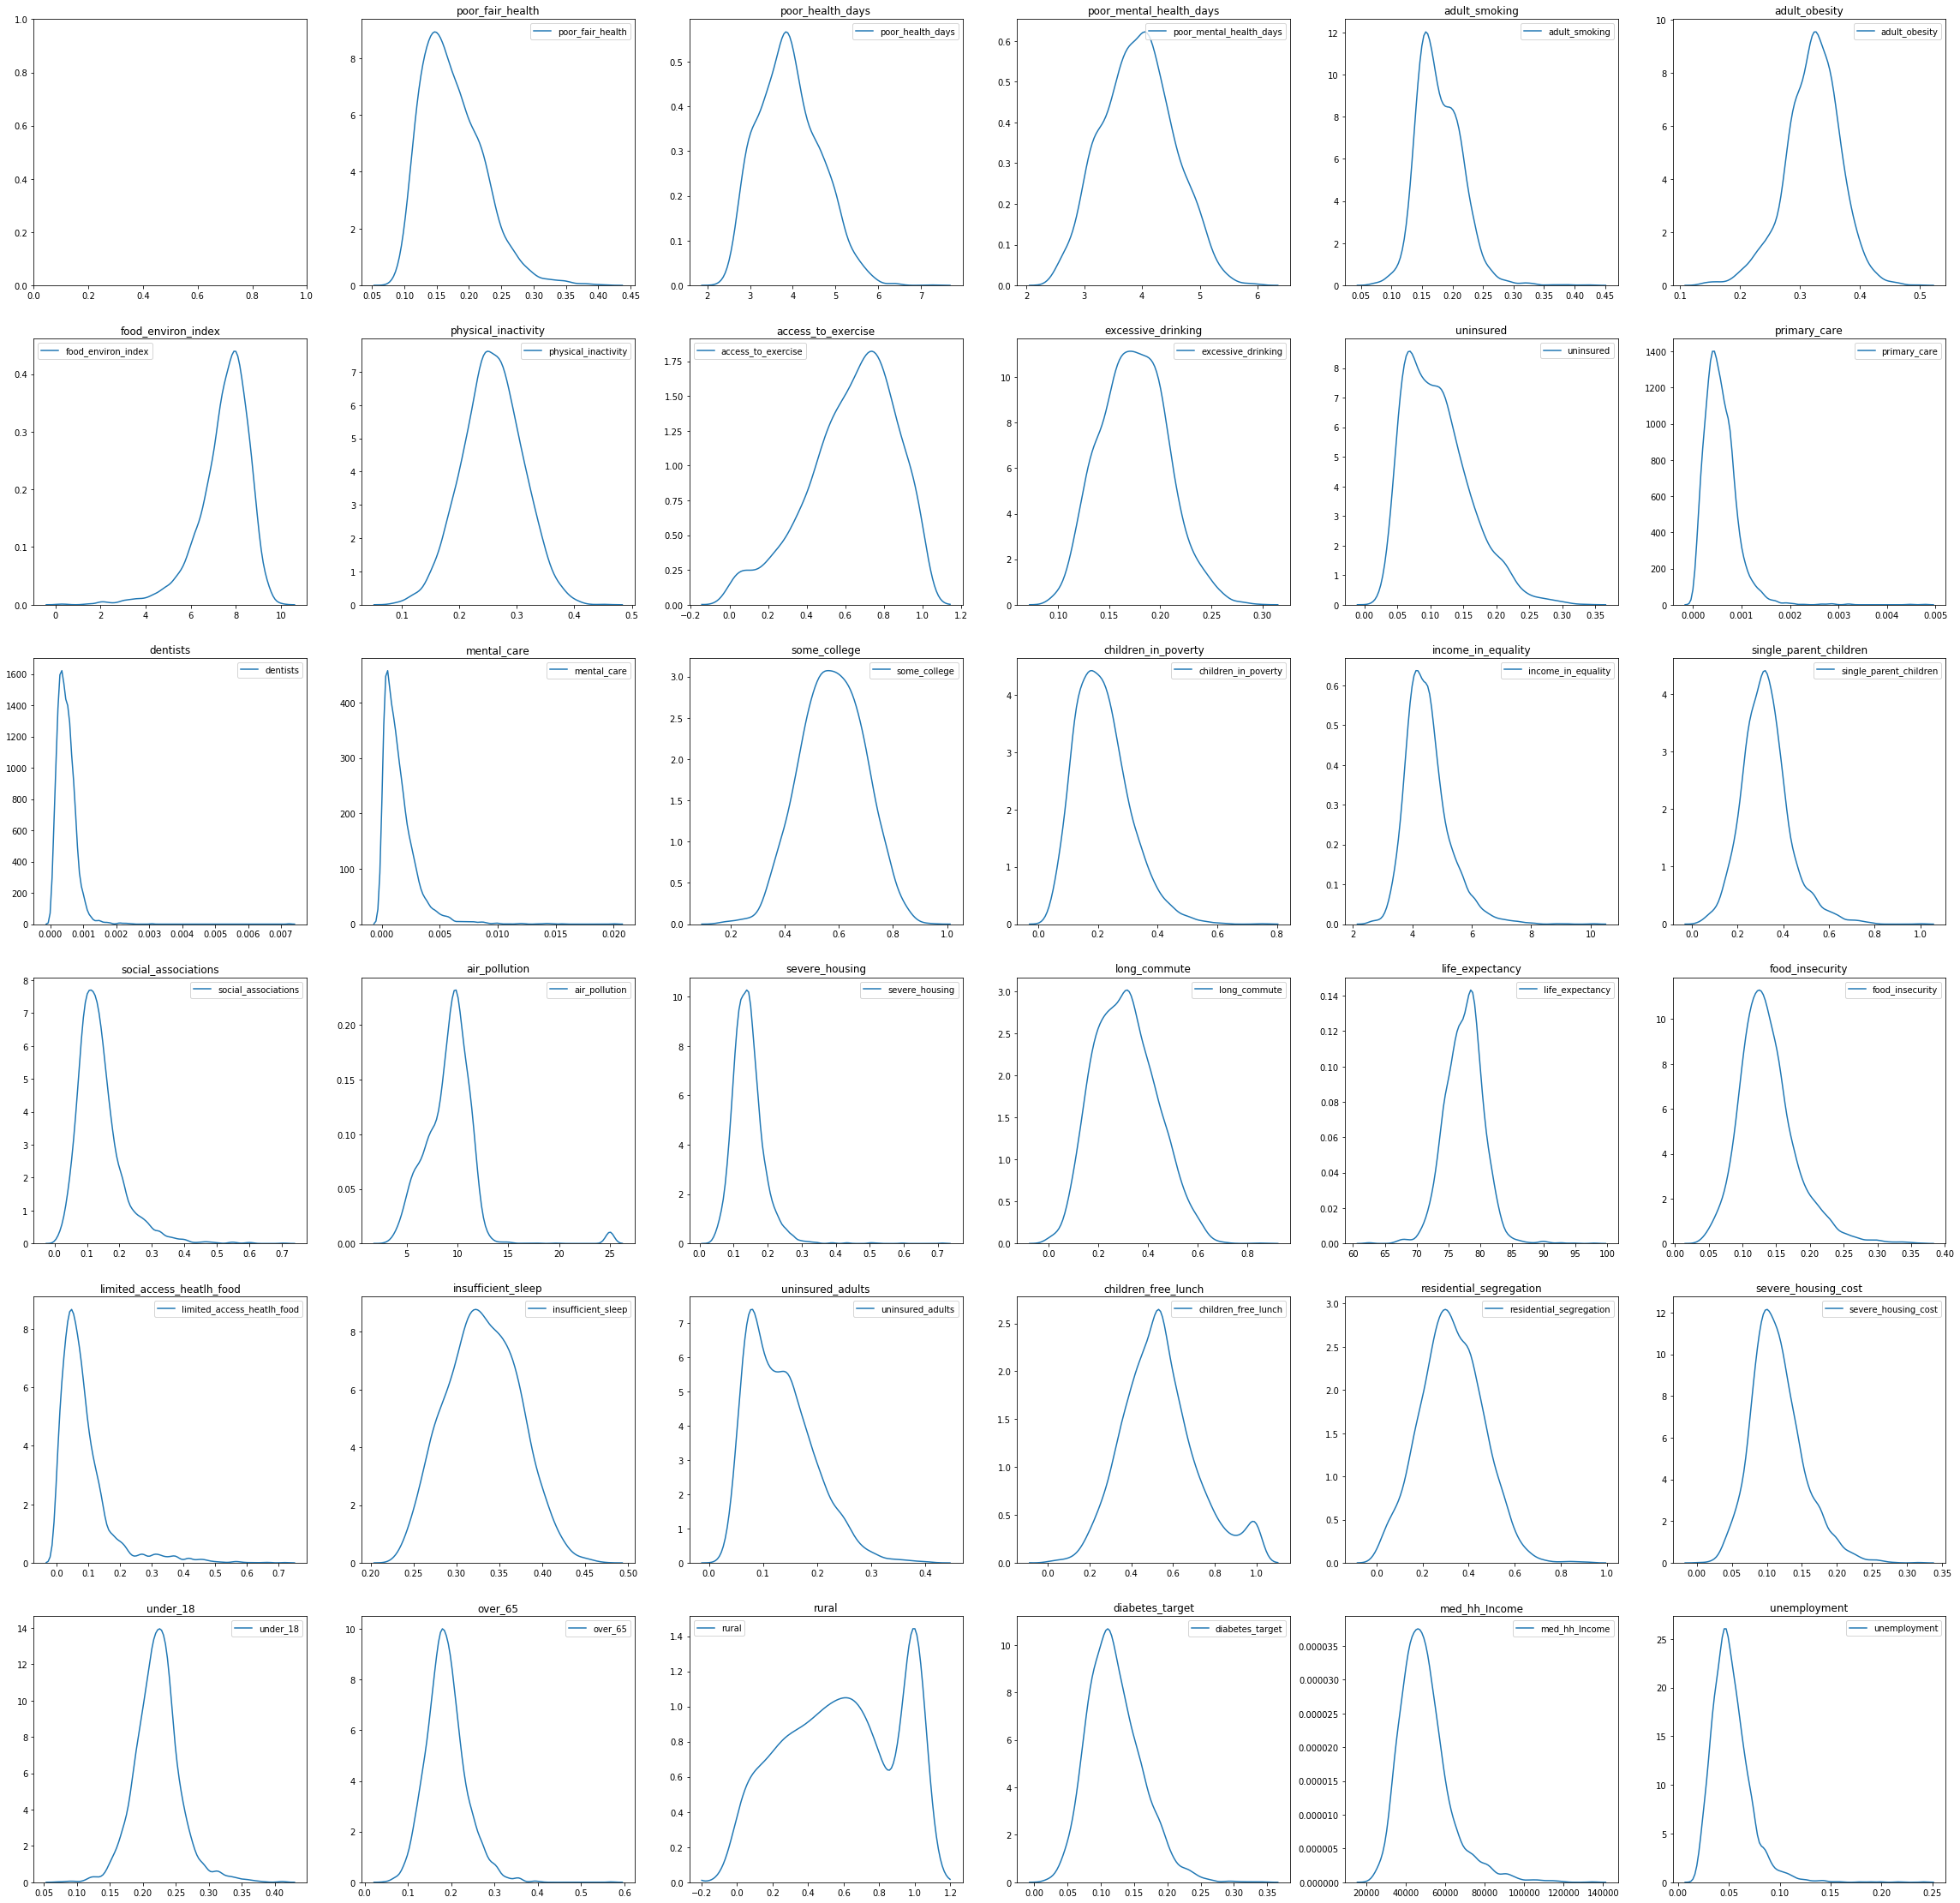

In [123]:
fig2, axes2 = plt.subplots(6, 6, figsize = (40,40))
print(axes2.shape)


for n in range(2,37):
    
    i = df_diabetes4.dtypes.index[n-1]
    
    row = (n-1)//6
    col = (n-1)%6
    
    ax = axes2[row][col]
    sns.kdeplot(df_diabetes4[i], ax = ax)
    ax.set_title('{}'.format(i));

In [124]:
from scipy.stats import normaltest

In [125]:
for col in df_diabetes4.columns:
    
    if df_diabetes4[col].dtype == 'float':
        
        if normaltest(df_diabetes4[col]).pvalue > 0.05:
    
            print(col,':', normaltest(df_diabetes4[col]).pvalue)

physical_inactivity : 0.5656976358723753


Only one predictor variable is close to normal. will need to transform every other numeric variable.

In [126]:
df_diabetes_logged = df_diabetes4.copy()

for col in [x for x in df_diabetes_logged.columns if x not in ['FIPS_code', 'physical_inactivity']]:
    
    if col != 'rural':
    
        df_diabetes_logged[col] = np.log(df_diabetes_logged[col])
        
    else:
        
        df_diabetes_logged[col] = np.log(df_diabetes_logged[col]+10)
        #rural values are negative we shift 10

In [127]:

df_diabetes_logged.head()

,FIPS_code,poor_fair_health,poor_health_days,poor_mental_health_days,adult_smoking,adult_obesity,food_environ_index,physical_inactivity,access_to_exercise,excessive_drinking,uninsured,primary_care,dentists,mental_care,some_college,children_in_poverty,income_in_equality,single_parent_children,social_associations,air_pollution,severe_housing,long_commute,life_expectancy,food_insecurity,limited_access_heatlh_food,insufficient_sleep,uninsured_adults,children_free_lunch,residential_segregation,severe_housing_cost,under_18,over_65,rural,diabetes_target,med_hh_Income,unemployment
1,01001,-1.692215,1.435222,1.460181,-1.654192,-0.980829,1.974081,0.311,-0.375749,-1.779158,-2.464990,-7.787129,-8.033838,-8.726986,-0.496682,-1.645065,1.533995,-1.398363,-2.068958,2.459589,-1.900148,-0.959720,4.335074,-2.009915,-2.121003,-1.024282,-2.210817,-0.735394,-1.303883,-2.067892,-1.429744,-1.889176,2.343729,-2.198225,10.905717,-2.975930
2,01003,-1.711445,1.410682,1.446836,-1.784060,-1.171183,2.079442,0.238,-0.328906,-1.788866,-2.234993,-7.224116,-7.603860,-6.999441,-0.413488,-1.917323,1.508193,-1.378958,-2.235654,2.332144,-1.978205,-0.903868,4.364365,-2.095571,-2.914258,-1.099437,-1.997286,-0.796751,-1.101414,-2.056044,-1.521039,-1.612089,2.343995,-2.234926,10.941288,-2.937463
3,01005,-1.355827,1.622835,1.533635,-1.535218,-0.814186,1.722767,0.282,-0.623142,-2.063669,-2.078386,-7.861920,-7.940149,-9.444226,-1.000379,-0.687165,1.750080,-0.558341,-2.468292,2.442347,-1.867203,-1.084709,4.327827,-1.461018,-2.231226,-0.952873,-1.799253,-0.304221,-1.414128,-1.996074,-1.571961,-1.670001,2.368176,-1.737271,10.400741,-2.488915
4,01007,-1.609592,1.473246,1.462262,-1.613626,-0.972861,2.028148,0.349,-1.816993,-1.837271,-2.335101,-7.462657,-8.236950,-9.335562,-0.725540,-1.298283,1.447999,-1.218565,-2.286942,2.415914,-2.210840,-0.721547,4.303095,-1.845160,-3.649033,-0.963674,-2.095789,-0.425724,-0.954527,-2.437959,-1.579581,-1.831171,2.368703,-1.931022,10.670791,-2.748872
5,01009,-1.556119,1.506907,1.547903,-1.626983,-1.067114,2.140066,0.285,-1.471883,-1.872185,-2.110808,-8.398132,-8.483516,-9.176663,-0.608549,-1.687399,1.417523,-1.218419,-2.406668,2.459589,-2.263254,-0.515838,4.312111,-2.207275,-3.547328,-1.023180,-1.860171,-0.629013,-1.550897,-2.501708,-1.454576,-1.723584,2.388718,-1.771957,10.762425,-2.918771


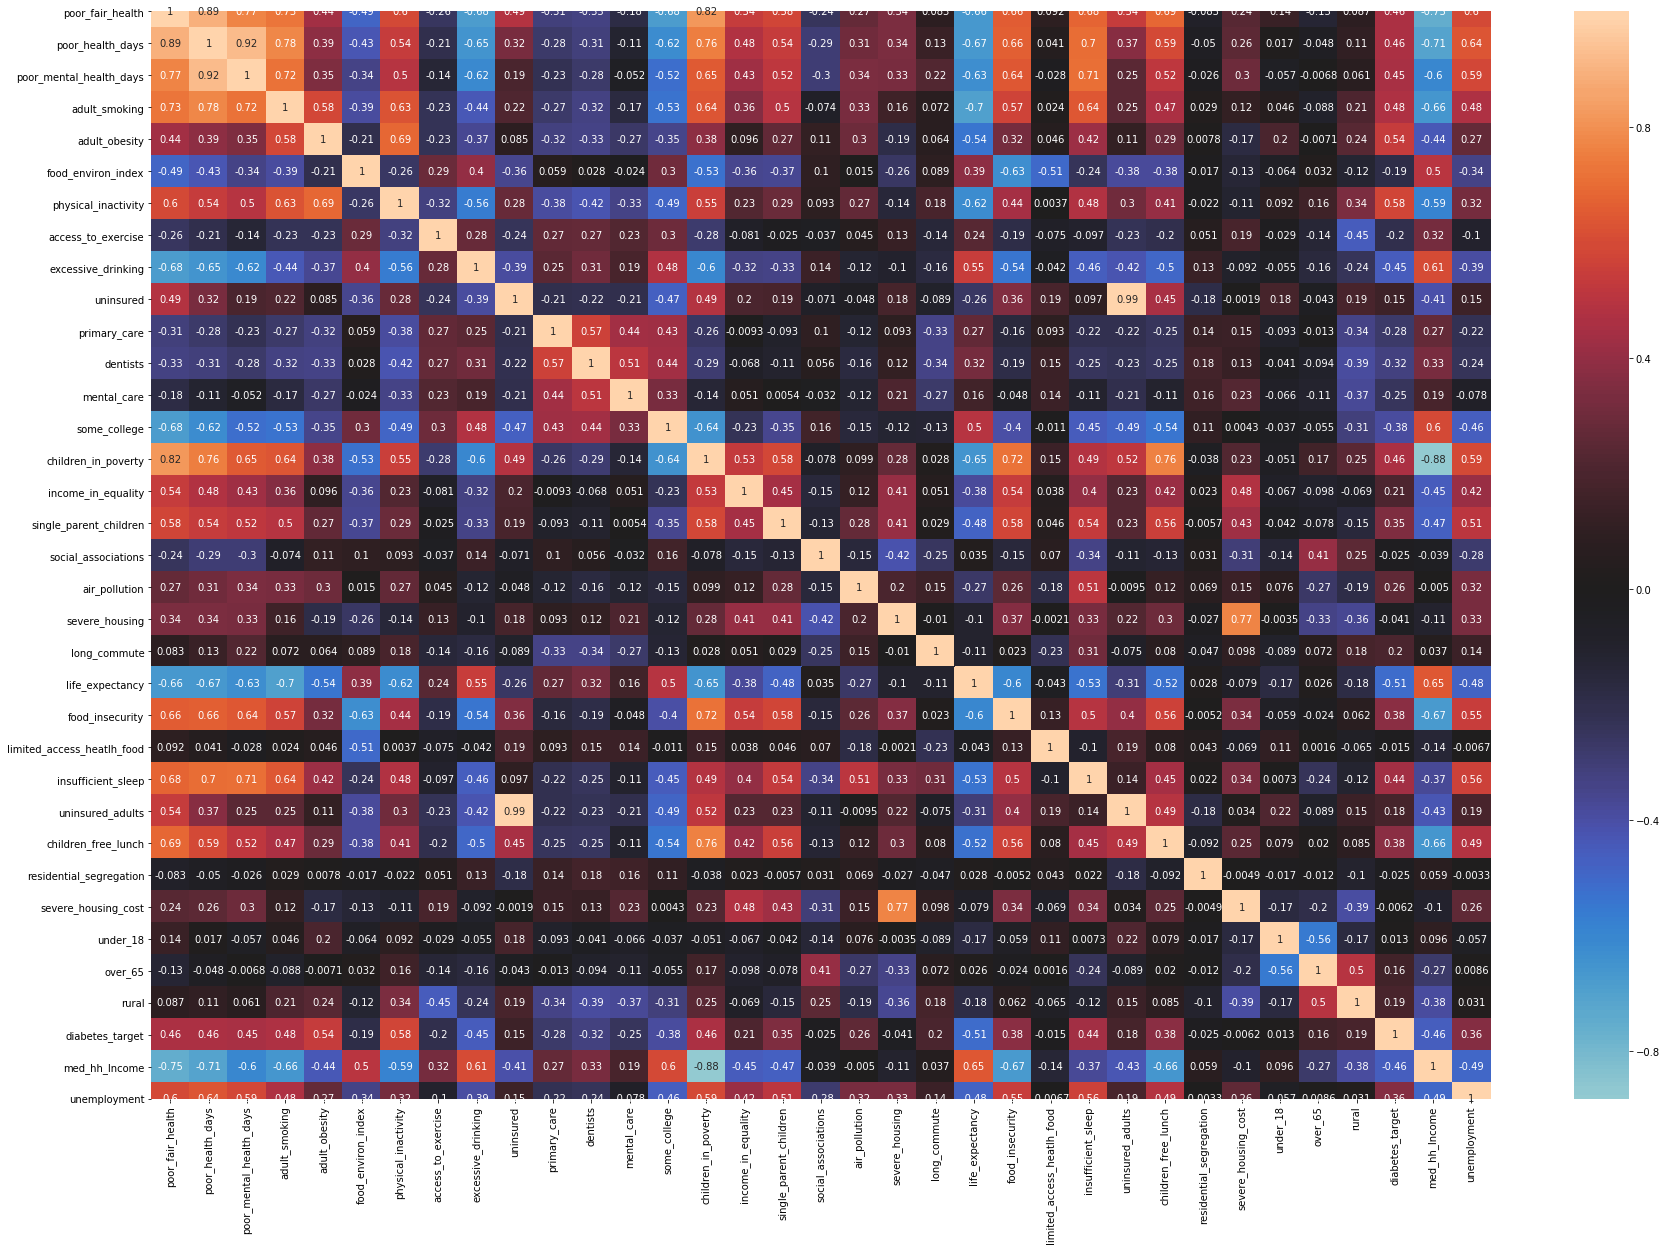

In [128]:
fig = plt.figure(figsize = (30,20))
sns.heatmap(df_diabetes_logged.corr(), center=0, annot=True);

In [129]:
cols_to_remove = ['uninsured_adults',
'severe_housing_cost',
'med_hh_Income',
'life_expectancy',
'some_college',
'poor_fair_health',
'poor_health_days',
'poor_mental_health_days',
'children_free_lunch',
'adult_obesity',
'food_environ_index']

In [130]:
df_diabetes_logged_stripped = df_diabetes_logged.drop(cols_to_remove,axis=1)

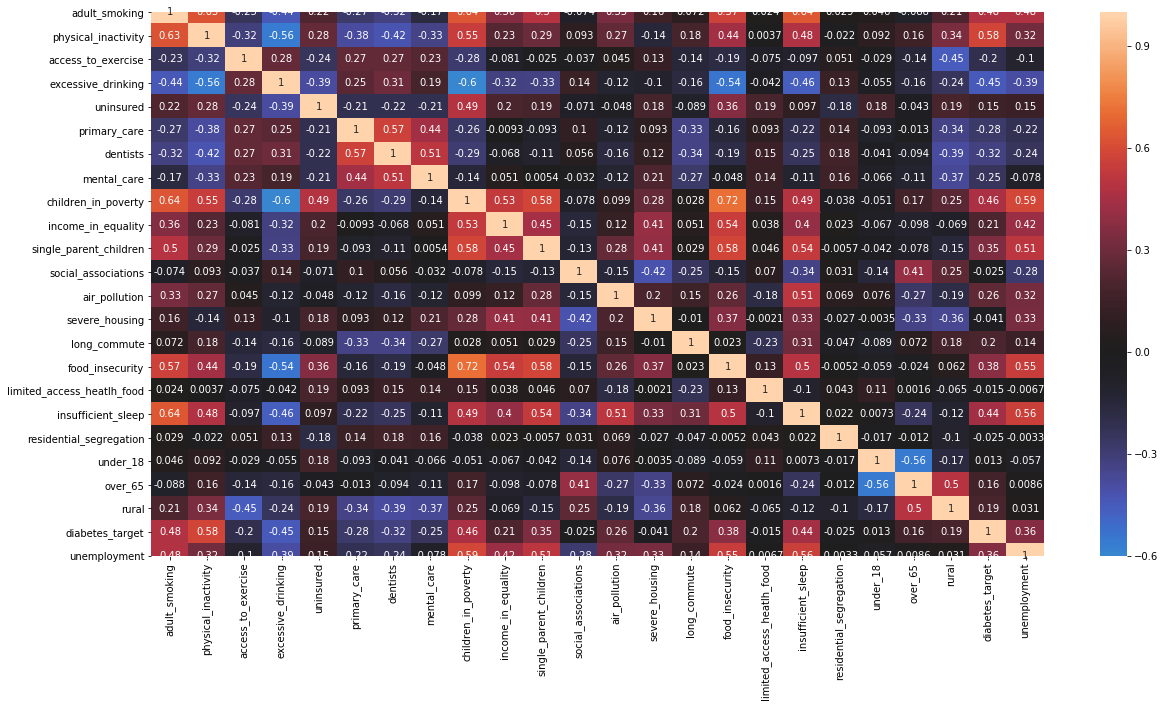

In [131]:
fig = plt.figure(figsize = (20,10))
sns.heatmap(df_diabetes_logged_stripped.corr(), center=0,annot=True);

In [132]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [133]:
target = df_diabetes_logged_stripped['diabetes_target']
features = df_diabetes_logged_stripped.drop(columns=['diabetes_target', 'FIPS_code'], axis=1)

In [134]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=20, test_size=0.33)


In [135]:
y_train

434    -1.832581
1584   -1.589635
21     -1.703749
2959   -1.737271
1091   -2.095571
          ...   
1453   -2.659260
2484   -2.419119
3020   -2.189256
277    -2.995732
2565   -2.207275
Name: diabetes_target, Length: 2105, dtype: float64

In [136]:
print(len(X_train),len(X_test),len(y_train),len(y_test))

2105 1037 2105 1037


Initialise folds (to be applied on the train data)

In [137]:
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)

In [138]:
regression = LinearRegression()

In [139]:
baseline = np.mean(cross_val_score(regression, X_train, y_train, scoring='r2', cv=crossvalidation))



In [140]:

baseline

0.42955476388142416

In [141]:
# Initialize the scaler
scaler = StandardScaler()

#   Scale all continuous features
#   scale both train and test data.
transformed_training_features = scaler.fit_transform(X_train.iloc[:,:])
transformed_testing_features = scaler.transform(X_test.iloc[:,:])

In [142]:
X_train_transformed = pd.DataFrame(scaler.transform(X_train.iloc[:,:]), 
                                   columns=X_train.columns[:], 
                                   index=X_train.index)

In [143]:
X_test_transformed = pd.DataFrame(scaler.transform(X_test.iloc[:,:]), 
                                   columns=X_test.columns[:], 
                                   index=X_test.index)

In [144]:
X_train.head()

,adult_smoking,physical_inactivity,access_to_exercise,excessive_drinking,uninsured,primary_care,dentists,mental_care,children_in_poverty,income_in_equality,single_parent_children,social_associations,air_pollution,severe_housing,long_commute,food_insecurity,limited_access_heatlh_food,insufficient_sleep,residential_segregation,under_18,over_65,rural,unemployment
434,-1.549905,0.317,-0.417712,-1.955104,-1.708275,-7.448159,-8.147693,-8.147693,-1.148854,1.589620,-0.974776,-2.372985,2.370244,-1.879140,-1.194022,-1.754464,-2.817846,-1.003690,-2.004789,-1.367772,-1.830529,2.360299,-2.918771
1584,-1.720703,0.281,-1.106207,-1.605106,-2.323352,-8.829373,-8.136079,-9.522374,-2.244316,1.263179,-1.963530,-2.209300,2.282382,-2.947359,-0.843970,-2.333044,-3.431882,-1.172961,-0.790068,-1.474864,-1.762759,2.397895,-3.381395
21,-1.610582,0.300,-1.332674,-1.935470,-2.162247,-8.847432,-8.844409,-7.591645,-1.227583,1.751485,-0.917923,-2.227359,2.370244,-2.309106,-0.825536,-1.795767,-1.769662,-0.979447,-1.737252,-1.466025,-1.675443,2.397895,-2.847312
2959,-1.576450,0.287,-0.317920,-1.843335,-2.129497,-7.486104,-8.481203,-7.034284,-1.220780,1.547645,-1.086419,-2.334390,2.261763,-2.034263,-1.406497,-1.903809,-3.300301,-0.920368,-0.939981,-1.624084,-1.742311,2.357708,-2.453408
1091,-1.463713,0.268,-0.287720,-1.995798,-2.858542,-7.267176,-7.266245,-5.576765,-1.335601,1.701244,-1.176466,-1.620552,2.332144,-2.271161,-1.402424,-1.820159,-2.625376,-0.977676,-1.106971,-1.452363,-1.717169,2.356502,-2.748872


In [145]:
X_train_transformed.head()

,adult_smoking,physical_inactivity,access_to_exercise,excessive_drinking,uninsured,primary_care,dentists,mental_care,children_in_poverty,income_in_equality,single_parent_children,social_associations,air_pollution,severe_housing,long_commute,food_insecurity,limited_access_heatlh_food,insufficient_sleep,residential_segregation,under_18,over_65,rural,unemployment
434,0.957618,1.157017,0.247261,-0.999397,1.292271,0.311921,-0.602376,-1.210424,1.068142,0.579701,0.594877,-0.574496,0.673677,0.352128,0.157561,0.919389,0.061611,0.866428,-1.323019,0.923754,-0.513437,0.040797,0.246715
1584,0.110393,0.464545,-0.798497,0.852391,-0.076235,-1.927792,-0.582686,-2.565649,-1.365708,-1.484641,-2.244880,-0.235352,0.343966,-3.073758,0.853315,-0.992934,-0.479265,-0.461867,0.777667,0.249068,-0.240403,1.314939,-1.128996
21,0.656638,0.830016,-1.142478,-0.895514,0.282214,-1.957076,-1.783544,-0.662245,0.893225,1.603303,0.758160,-0.272769,0.673677,-1.026816,0.889954,0.782872,0.984909,1.056667,-0.860352,0.304756,0.111380,1.314939,0.459214
2959,0.825946,0.579957,0.398834,-0.408043,0.355079,0.250391,-1.167788,-0.112772,0.908339,0.314260,0.274231,-0.494529,0.266590,-0.145368,-0.264748,0.425774,-0.363362,1.520275,0.518415,-0.691021,-0.158018,-0.047022,1.630574
1091,1.385169,0.214485,0.444705,-1.214700,-1.266996,0.605394,0.891976,1.324120,0.653234,1.285594,0.015613,0.984483,0.530703,-0.905124,-0.256652,0.702253,0.231149,1.070563,0.229630,0.390822,-0.056727,-0.087875,0.751947


In [158]:
xy.head()

,adult_smoking,physical_inactivity,access_to_exercise,excessive_drinking,uninsured,primary_care,dentists,mental_care,children_in_poverty,income_in_equality,single_parent_children,social_associations,air_pollution,severe_housing,long_commute,food_insecurity,limited_access_heatlh_food,insufficient_sleep,residential_segregation,under_18,over_65,rural,unemployment,diabetes_target
434,0.957618,1.157017,0.247261,-0.999397,1.292271,0.311921,-0.602376,-1.210424,1.068142,0.579701,0.594877,-0.574496,0.673677,0.352128,0.157561,0.919389,0.061611,0.866428,-1.323019,0.923754,-0.513437,0.040797,0.246715,-1.832581
1584,0.110393,0.464545,-0.798497,0.852391,-0.076235,-1.927792,-0.582686,-2.565649,-1.365708,-1.484641,-2.244880,-0.235352,0.343966,-3.073758,0.853315,-0.992934,-0.479265,-0.461867,0.777667,0.249068,-0.240403,1.314939,-1.128996,-1.589635
21,0.656638,0.830016,-1.142478,-0.895514,0.282214,-1.957076,-1.783544,-0.662245,0.893225,1.603303,0.758160,-0.272769,0.673677,-1.026816,0.889954,0.782872,0.984909,1.056667,-0.860352,0.304756,0.111380,1.314939,0.459214,-1.703749
2959,0.825946,0.579957,0.398834,-0.408043,0.355079,0.250391,-1.167788,-0.112772,0.908339,0.314260,0.274231,-0.494529,0.266590,-0.145368,-0.264748,0.425774,-0.363362,1.520275,0.518415,-0.691021,-0.158018,-0.047022,1.630574,-1.737271
1091,1.385169,0.214485,0.444705,-1.214700,-1.266996,0.605394,0.891976,1.324120,0.653234,1.285594,0.015613,0.984483,0.530703,-0.905124,-0.256652,0.702253,0.231149,1.070563,0.229630,0.390822,-0.056727,-0.087875,0.751947,-2.095571


In [146]:
from sklearn.metrics import SCORERS

In [147]:
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [148]:
from sklearn.model_selection import cross_validate

In [149]:
a = cross_validate(regression, X_train, y_train, scoring=('r2', 'neg_mean_squared_error'), cv=crossvalidation,
              return_train_score=True)

In [150]:
for k, v in a.items():
    
    print(k, np.mean(v))

fit_time 0.015422391891479491
score_time 0.002414989471435547
test_r2 0.42955476388142416
train_r2 0.4502505617725575
test_neg_mean_squared_error -0.06852733945791983
train_neg_mean_squared_error -0.06628895575309016


In [151]:
b = cross_validate(regression, X_train_transformed, y_train, scoring=('r2', 'neg_mean_squared_error'), cv=crossvalidation,
              return_train_score=True)

In [152]:
for k, v in b.items():
    
    print(k, np.mean(v))

fit_time 0.002906656265258789
score_time 0.0018781661987304688
test_r2 0.42955476388142416
train_r2 0.4502505617725575
test_neg_mean_squared_error -0.06852733945791982
train_neg_mean_squared_error -0.06628895575309016


In [153]:
from sklearn.preprocessing import PolynomialFeatures

In [154]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

In [155]:
X_poly_train = pd.DataFrame(poly.fit_transform(X_train_transformed), columns=poly.get_feature_names(features.columns))
X_poly_test = pd.DataFrame(poly.transform(X_test_transformed), columns=poly.get_feature_names(features.columns))
X_poly_train.head()

,adult_smoking,physical_inactivity,access_to_exercise,excessive_drinking,uninsured,primary_care,dentists,mental_care,children_in_poverty,income_in_equality,single_parent_children,social_associations,air_pollution,severe_housing,long_commute,food_insecurity,limited_access_heatlh_food,insufficient_sleep,residential_segregation,under_18,over_65,rural,unemployment,adult_smoking^2,adult_smoking physical_inactivity,adult_smoking access_to_exercise,adult_smoking excessive_drinking,adult_smoking uninsured,adult_smoking primary_care,adult_smoking dentists,adult_smoking mental_care,adult_smoking children_in_poverty,adult_smoking income_in_equality,adult_smoking single_parent_children,adult_smoking social_associations,adult_smoking air_pollution,adult_smoking severe_housing,adult_smoking long_commute,adult_smoking food_insecurity,adult_smoking limited_access_heatlh_food,adult_smoking insufficient_sleep,adult_smoking residential_segregation,adult_smoking under_18,adult_smoking over_65,adult_smoking rural,adult_smoking unemployment,physical_inactivity^2,physical_inactivity access_to_exercise,physical_inactivity excessive_drinking,physical_inactivity uninsured,physical_inactivity primary_care,physical_inactivity dentists,physical_inactivity mental_care,physical_inactivity children_in_poverty,physical_inactivity income_in_equality,physical_inactivity single_parent_children,physical_inactivity social_associations,physical_inactivity air_pollution,physical_inactivity severe_housing,physical_inactivity long_commute,physical_inactivity food_insecurity,physical_inactivity limited_access_heatlh_food,physical_inactivity insufficient_sleep,physical_inactivity residential_segregation,physical_inactivity under_18,physical_inactivity over_65,physical_inactivity rural,physical_inactivity unemployment,access_to_exercise^2,access_to_exercise excessive_drinking,access_to_exercise uninsured,access_to_exercise primary_care,access_to_exercise dentists,access_to_exercise mental_care,access_to_exercise children_in_poverty,access_to_exercise income_in_equality,access_to_exercise single_parent_children,access_to_exercise social_associations,access_to_exercise air_pollution,access_to_exercise severe_housing,access_to_exercise long_commute,access_to_exercise food_insecurity,access_to_exercise limited_access_heatlh_food,access_to_exercise insufficient_sleep,access_to_exercise residential_segregation,access_to_exercise under_18,access_to_exercise over_65,access_to_exercise rural,access_to_exercise unemployment,excessive_drinking^2,excessive_drinking uninsured,excessive_drinking primary_care,excessive_drinking dentists,excessive_drinking mental_care,excessive_drinking children_in_poverty,excessive_drinking income_in_equality,excessive_drinking single_parent_children,excessive_drinking social_associations,excessive_drinking air_pollution,excessive_drinking severe_housing,excessive_drinking long_commute,excessive_drinking food_insecurity,excessive_drinking limited_access_heatlh_food,excessive_drinking insufficient_sleep,excessive_drinking residential_segregation,excessive_drinking under_18,excessive_drinking over_65,excessive_drinking rural,excessive_drinking unemployment,uninsured^2,uninsured primary_care,uninsured dentists,uninsured mental_care,uninsured children_in_poverty,uninsured income_in_equality,uninsured single_parent_children,uninsured social_associations,uninsured air_pollution,uninsured severe_housing,uninsured long_commute,uninsured food_insecurity,uninsured limited_access_heatlh_food,uninsured insufficient_sleep,uninsured residential_segregation,uninsured under_18,uninsured over_65,uninsured rural,uninsured unemployment,primary_care^2,primary_care dentists,primary_care mental_care,primary_care children_in_poverty,primary_care income_in_equality,primary_care single_parent_children,primary_care social_associations,primary_care air_pollution,primary_care severe_housing,primary_care long_commute,primary_care food_insecurity,primary_care limited_access_heatlh_

In [156]:
# Another way for Polynomial regression before scaling
poly = PolynomialFeatures(3, include_bias=False)
X_transformed = poly.fit_transform(X_train)
poly.get_feature_names(X_train.columns)
dfx = pd.DataFrame(X_transformed)
dfx.columns = poly.get_feature_names(X_train.columns)
dfx

,adult_smoking,physical_inactivity,access_to_exercise,excessive_drinking,uninsured,primary_care,dentists,mental_care,children_in_poverty,income_in_equality,single_parent_children,social_associations,air_pollution,severe_housing,long_commute,food_insecurity,limited_access_heatlh_food,insufficient_sleep,residential_segregation,under_18,over_65,rural,unemployment,adult_smoking^2,adult_smoking physical_inactivity,adult_smoking access_to_exercise,adult_smoking excessive_drinking,adult_smoking uninsured,adult_smoking primary_care,adult_smoking dentists,adult_smoking mental_care,adult_smoking children_in_poverty,adult_smoking income_in_equality,adult_smoking single_parent_children,adult_smoking social_associations,adult_smoking air_pollution,adult_smoking severe_housing,adult_smoking long_commute,adult_smoking food_insecurity,adult_smoking limited_access_heatlh_food,adult_smoking insufficient_sleep,adult_smoking residential_segregation,adult_smoking under_18,adult_smoking over_65,adult_smoking rural,adult_smoking unemployment,physical_inactivity^2,physical_inactivity access_to_exercise,physical_inactivity excessive_drinking,physical_inactivity uninsured,physical_inactivity primary_care,physical_inactivity dentists,physical_inactivity mental_care,physical_inactivity children_in_poverty,physical_inactivity income_in_equality,physical_inactivity single_parent_children,physical_inactivity social_associations,physical_inactivity air_pollution,physical_inactivity severe_housing,physical_inactivity long_commute,physical_inactivity food_insecurity,physical_inactivity limited_access_heatlh_food,physical_inactivity insufficient_sleep,physical_inactivity residential_segregation,physical_inactivity under_18,physical_inactivity over_65,physical_inactivity rural,physical_inactivity unemployment,access_to_exercise^2,access_to_exercise excessive_drinking,access_to_exercise uninsured,access_to_exercise primary_care,access_to_exercise dentists,access_to_exercise mental_care,access_to_exercise children_in_poverty,access_to_exercise income_in_equality,access_to_exercise single_parent_children,access_to_exercise social_associations,access_to_exercise air_pollution,access_to_exercise severe_housing,access_to_exercise long_commute,access_to_exercise food_insecurity,access_to_exercise limited_access_heatlh_food,access_to_exercise insufficient_sleep,access_to_exercise residential_segregation,access_to_exercise under_18,access_to_exercise over_65,access_to_exercise rural,access_to_exercise unemployment,excessive_drinking^2,excessive_drinking uninsured,excessive_drinking primary_care,excessive_drinking dentists,excessive_drinking mental_care,excessive_drinking children_in_poverty,excessive_drinking income_in_equality,excessive_drinking single_parent_children,excessive_drinking social_associations,excessive_drinking air_pollution,excessive_drinking severe_housing,excessive_drinking long_commute,excessive_drinking food_insecurity,excessive_drinking limited_access_heatlh_food,excessive_drinking insufficient_sleep,excessive_drinking residential_segregation,excessive_drinking under_18,excessive_drinking over_65,excessive_drinking rural,excessive_drinking unemployment,uninsured^2,uninsured primary_care,uninsured dentists,uninsured mental_care,uninsured children_in_poverty,uninsured income_in_equality,uninsured single_parent_children,uninsured social_associations,uninsured air_pollution,uninsured severe_housing,uninsured long_commute,uninsured food_insecurity,uninsured limited_access_heatlh_food,uninsured insufficient_sleep,uninsured residential_segregation,uninsured under_18,uninsured over_65,uninsured rural,uninsured unemployment,primary_care^2,primary_care dentists,primary_care mental_care,primary_care children_in_poverty,primary_care income_in_equality,primary_care single_parent_children,primary_care social_associations,primary_care air_pollution,primary_care severe_housing,primary_care long_commute,primary_care food_insecurity,primary_care limited_access_heatlh_